# Маркетинговый анализ развлекательного приложения Procrastinate Pro+

**Данные**:  Данные о пользователях, привлечённых с 1 мая по 27 октября 2019 года:
- лог сервера с данными об их посещениях,
- выгрузка их покупок за этот период,
- рекламные расходы.


**Цель работы**:  разобраться в причинах убытков компании, делающей огромные вложения в рекламу,  и помочь компании выйти в плюс.

**Основные задачи**:
1. Выяснить откуда приходят пользователи и какими устройствами они пользуются;
2. Определить сколько стоит привлечение пользователей из различных рекламных каналов;
3. Рассчитать сколько денег приносит каждый клиент;
4. Определить, когда расходы на привлечение клиента окупаются;
5. Изучить какие факторы мешают привлечению клиентов.



**Описание данных**:
Файл **visits_info_short.csv** хранит лог сервера с информацией о посещениях сайта, **orders_info_short.csv** — информацию о заказах, а **costs_info_short.csv** — информацию о расходах на рекламу.

Структура **visits_info_short.csv**:
- **User Id** — уникальный идентификатор пользователя,
- **Region** — страна пользователя,
- **Device** — тип устройства пользователя,
- **Channel** — идентификатор источника перехода,
- **Session Start** — дата и время начала сессии,
- **Session End** — дата и время окончания сессии.

Структура **orders_info_short.csv**:
- **User Id** — уникальный идентификатор пользователя,
- **Event Dt** — дата и время покупки,
- **Revenue** — сумма заказа.

Структура **costs_info_short.csv**:
- **dt** — дата проведения рекламной кампании,
- **Channel** — идентификатор рекламного источника,
- **costs** — расходы на эту кампанию.


## Загрузим данные и подготовим их к анализу

### Загрузим данные из файла в датафрейм.

In [1]:
# Импортируем необходимые библиотеки :
import pandas as pd

import numpy as np

from datetime import  datetime, timedelta

import matplotlib.pyplot as plt

# Вводим конфигурацию,улучшающую четкость картинок во всем проекте:
%config InlineBackend.figure_format = 'retina'

Загрузим данные о визитах, заказах и рекламных расходах из CSV-файлов в переменные.

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).



In [2]:
# Считываем данные из csv-файлов в датафреймы:
visits = pd.read_csv('/datasets/visits_info_short.csv') # журнал сессий
orders = pd.read_csv('/datasets/orders_info_short.csv') # покупки
costs = pd.read_csv('/datasets/costs_info_short.csv')   # траты на рекламу


### Изучим общую информацию о полученном датафрейме

In [3]:
# Выводим первые 5 строк датафрейфмов на экран с помощью методов display() и head():

display(visits.head())
display(orders.head())
display(costs.head())

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [4]:
# Выводим основную информацию о каждом датафрейме с помощью метода info():
visits.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [6]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


Тип данных столбцов, содержащих дату и время, которые мы будем использовать, необходимо будет перевести из типа данных object в datetime.

### Подготовим данные к анализу

#### Проверим, есть ли про пропуски в данных

In [7]:
# Ищем пропуски в датафреймах методом isna() и sum(): 
visits.isna().sum().sort_values(ascending=False)

User Id          0
Region           0
Device           0
Channel          0
Session Start    0
Session End      0
dtype: int64

In [8]:

orders.isna().sum().sort_values(ascending=False)

User Id     0
Event Dt    0
Revenue     0
dtype: int64

In [9]:
# 
costs.isna().sum().sort_values(ascending=False)

dt         0
Channel    0
costs      0
dtype: int64

В данных пропуски не обнаружены.

#### Проверим наличие явных дубликатов в датафреймах

In [10]:
# Проверяем датафреймы на наличие явных дубликатов методом duplicated() и считаем их количество методом sum():
visits.duplicated().sum()

0

In [11]:
orders.duplicated().sum()

0

In [12]:
costs.duplicated().sum()

0

Дубликатов в анализируемых данных не обнаружено.

#### Приведем заголовки столбцов датафреймов к нижнему и «змеиному» регистрам. 

In [13]:
# Применяем к каждому датафрейму метод str.lower() и заменяем пропуски между словами в заголовке каждого столбца на символ '_':
visits.columns = visits.columns.str.lower()
visits.columns = visits.columns.str.replace(' ', '_')
# Проверяем, что получилось 
visits

user_id         region   device         channel  \
0       981449118918  United States   iPhone         organic   
1       278965908054  United States   iPhone         organic   
2       590706206550  United States      Mac         organic   
3       326433527971  United States  Android          TipTop   
4       349773784594  United States      Mac         organic   
...              ...            ...      ...             ...   
309896  329994900775             UK       PC         LeapBob   
309897  334903592310         France       PC  lambdaMediaAds   
309898  540102010126        Germany       PC         organic   
309899  308736936846        Germany      Mac         organic   
309900  109329042535        Germany       PC  lambdaMediaAds   

              session_start          session_end  
0       2019-05-01 02:36:01  2019-05-01 02:45:01  
1       2019-05-01 04:46:31  2019-05-01 04:47:35  
2       2019-05-01 14:09:25  2019-05-01 15:32:08  
3       2019-05-01 00:29:59  2019-05-01 00:54:25  
4       2019-05-01 03:33:35  2019-05-01 03:57:40  
...                     ...                  ...  
309896  2019-10-31 13:28:12  2019-10-31 14:39:29  
309897  2019-10-31 22:14:52  2019-10-31 22:39:36  
309898  2019-10-31 01:40:48  2019-10-31 01:41:31  
309899  2019-10-31 07:37:34  2019-10-31 07:37:55  
309900  2019-10-31 14:17:43  2019-10-31 15:17:04  

[309901 rows x 6 columns]

In [14]:
orders.columns = orders.columns.str.lower()
orders.columns = orders.columns.str.replace(' ', '_')
orders

user_id             event_dt  revenue
0      188246423999  2019-05-01 23:09:52     4.99
1      174361394180  2019-05-01 12:24:04     4.99
2      529610067795  2019-05-01 11:34:04     4.99
3      319939546352  2019-05-01 15:34:40     4.99
4      366000285810  2019-05-01 13:59:51     4.99
...             ...                  ...      ...
40207  651604369137  2019-10-31 16:19:07     4.99
40208  275341387049  2019-10-31 01:17:17     4.99
40209  374656616484  2019-10-31 06:17:29     4.99
40210  168548862926  2019-10-31 22:46:19     4.99
40211  329994900775  2019-10-31 13:29:06     4.99

[40212 rows x 3 columns]

In [15]:
costs.columns = costs.columns.str.lower()
costs.columns = costs.columns.str.replace(' ', '_')
costs

dt         channel  costs
0     2019-05-01        FaceBoom  113.3
1     2019-05-02        FaceBoom   78.1
2     2019-05-03        FaceBoom   85.8
3     2019-05-04        FaceBoom  136.4
4     2019-05-05        FaceBoom  122.1
...          ...             ...    ...
1795  2019-10-23  lambdaMediaAds    4.0
1796  2019-10-24  lambdaMediaAds    6.4
1797  2019-10-25  lambdaMediaAds    8.8
1798  2019-10-26  lambdaMediaAds    8.8
1799  2019-10-27  lambdaMediaAds   12.0

[1800 rows x 3 columns]

### Изменим типы данных

Заменим тип данных в столбцах с датой и временем начала сессии, датой и временем окончания сессии, датой и временем покупки и датой проведения рекламной кампании на тип datetime.

In [16]:
# Преобразование данных о времени методом to_datetime():

visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

In [17]:
# Проверим, изменился ли тип данных методом data.info():
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [18]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [19]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


*Выводы по разделу 1:*

- В результате изучения данных установлено, что в них отсутствуют пропуски и явные дубликаты; 
- Данные подготовлены к дальнейшему анализу: типы данных во всех колонках соответствуют сохранённым в них значениям, а названия колонок таблиц приведены к хорошему стилю (нижнему и «змеиному» регистрам).



## Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.



Функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

In [20]:
# функция для создания пользовательских профилей

def get_profiles(sessions, orders, ad_costs):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

   
    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

In [21]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [22]:
# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

In [23]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

Функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

In [24]:
# функция для сглаживания фрейма

def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

In [25]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

In [26]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 


In [27]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

## Проведем исследовательский анализ данных

### Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.

Получим профили пользователей. Для этого вызовем функцию get_profiles(), передав ей данные о посещениях, покупках и тратах на рекламу.

In [28]:
profiles = get_profiles(visits, orders, costs)
profiles.head()

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей.

In [29]:
# Определим минимальную дату привлечения пользователей
min_analysis_date = profiles['dt'].min()
print(min_analysis_date)

2019-05-01


Минимальная дата привлечения пользователей - 1 мая 2019 года.

In [30]:
# Определим максмиальную дату привлечения пользователей
max_analysis_date = profiles['dt'].max()
print(max_analysis_date)

2019-10-27


Максимальная дата привлечения пользователей - 27 октября 2019 года.

Таким образом, мы убедились,что данные в таблице действительно представлены за тот же период, что установлен в техническом задании.

### Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей

In [31]:
# Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны, методом pivot_table()
country_date = profiles.pivot_table(index='region',  values='payer', aggfunc=['count','mean'])
country_date.columns=['Количество пользователей', 'Доля платящих пользователей']
country_date.round(3).sort_values(by='Доля платящих пользователей',ascending=False)

Количество пользователей  Доля платящих пользователей
region                                                              
United States                    100002                        0.069
Germany                           14981                        0.041
UK                                17575                        0.040
France                            17450                        0.038

В приложение приходят пользователи из США, Германии, Великобритании и Франции, причем пользователей из США в 2 раза больше, чем суммарное количество пользователей из всех остальных стран. На США приходится больше всего платящих пользователей (около 7 %). Доли платящих пользователей из Германии, Великобритании и Франции близки и составляют около 4 % в каждой из этих стран. 

### Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. 

In [32]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства, методом pivot_table()
device_date = profiles.pivot_table(index='device',  values='payer', aggfunc=['count','mean'])
device_date.columns=['Количество пользователей', 'Доля платящих пользователей']
device_date.round(3).sort_values(by='Доля платящих пользователей',ascending=False)

Количество пользователей  Доля платящих пользователей
device                                                        
Mac                         30042                        0.064
iPhone                      54479                        0.062
Android                     35032                        0.059
PC                          30455                        0.050

Пользователи заходят в приложение с Mac, iPhone, Android и PC, при этом чаще всего с iPhone. Платящие пользователи больше всего предпочитают Mac (доля платящих пользователей 6,4 % ) и iPhone (6,2 %), чуть меньше Android (5,9 %) и ещё меньше ПК (5 %). 

### Изучим рекламные источники привлечения и определим каналы, из которых пришло больше всего платящих пользователей. 

In [33]:
# Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения, методом pivot_table()
channel_date = profiles.pivot_table(index='channel',  values='payer', aggfunc=['count','mean'])
channel_date.columns=['Количество пользователей', 'Доля платящих пользователей']
channel_date.round(3).sort_values(by='Доля платящих пользователей',ascending=False)


Количество пользователей  Доля платящих пользователей
channel                                                                  
FaceBoom                               29144                        0.122
AdNonSense                              3880                        0.113
lambdaMediaAds                          2149                        0.105
TipTop                                 19561                        0.096
RocketSuperAds                          4448                        0.079
WahooNetBanner                          8553                        0.053
YRabbit                                 4312                        0.038
MediaTornado                            4364                        0.036
LeapBob                                 8553                        0.031
OppleCreativeMedia                      8605                        0.027
organic                                56439                        0.021


Больше всего в приложение пришло органических пользователей (56439). Самые попярные рекламные источники привлечения - канал FaceBoom (29144 пользователя) и канал TipTop (19561 пользователь). Больше всего платящих пользователей пришло из каналов FaceBoom (12,2 %), AdNonSense (11,3 %), lambdaMediaAds (10,5 %) и TipTop (9,6 %).  	

*Выводы по разделу 3:*

- Составлены профили пользователей и определены минимальная (1 мая 2019 года) и максимальная дата (27 октября 2019 года) привлечения пользователей;
- Приложением пользуются пользователи из США, Германии, Великобритании и Франции. Практически половина всех пользователей приложения из США, среди которых самая высокая долей платящих, равная 7 %. Доли платящих пользователей из Германии, Великобритании и Франции достаточно близки, около 4 % в каждой из этих стран.
- Пользователи запускают приложение на следующих устройствах: Mac, iPhone, Android и PC, среди которых самым популярным является iPhone (54 479 пользователей), больше всего платящих пользователей на Mac (6,4 %), а меньше всего на ПК (5 %);
- Для привлечения пользователей было использовано 10 рекламных каналов, среди которых наибольшее число пользователей у каналов FaceBoom (29 144) и TipTop (19 561), а больше всего платящих пользователей привлечено через каналы FaceBoom (12,2 %), AdNonSense (11,3 %) и lambdaMediaAds (10,5 %).
- 38 % пользователей приложения - органические пользователи, на привлечение которых не было потрачено денег. 


## Маркетинг



### Посчитаем общую сумму расходов на маркетинг 

In [34]:
# Просуммируем все значения в столбце 'acquisition_cost' из датафрейма profiles и округлим методом round()
all_costs = round(profiles['acquisition_cost'].sum(),2)
all_costs

105497.3

Таким образом, общие расходы на маркетинг за рассматриваемый период составили 105497.3 руб.

### Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.

In [35]:
# Построим таблицу с рекламными источниками и суммой денег, которая была на них потрачена, методом pivot_table()
ad_date = profiles.pivot_table(index='channel',  values='acquisition_cost', aggfunc='sum')
ad_date.columns=['Траты на рекламный источник, руб']
ad_date.sort_values(by='Траты на рекламный источник, руб',ascending=False)

Траты на рекламный источник, руб
channel                                             
TipTop                                      54751.30
FaceBoom                                    32445.60
WahooNetBanner                               5151.00
AdNonSense                                   3911.25
OppleCreativeMedia                           2151.25
RocketSuperAds                               1833.00
LeapBob                                      1797.60
lambdaMediaAds                               1557.60
MediaTornado                                  954.48
YRabbit                                       944.22
organic                                         0.00

Больше всего денег, около половины от общей суммы расходов на маркетинг, было потрачено на привлечение пользователей через канал TipTop (траты в размере 54751.30 руб). На втором месте по тратам - канал FaceBoom (32445.60 руб). Вслед за ним идут каналы WahooNetBanner (5151 руб) и AdNonSense (3911.25 руб). Меньше всего денег было потрачено на привлечение пользователей через каналы MediaTornado и YRabbit, не более 1000 руб на каждый из них. 	 

### Построим визуализацию динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику

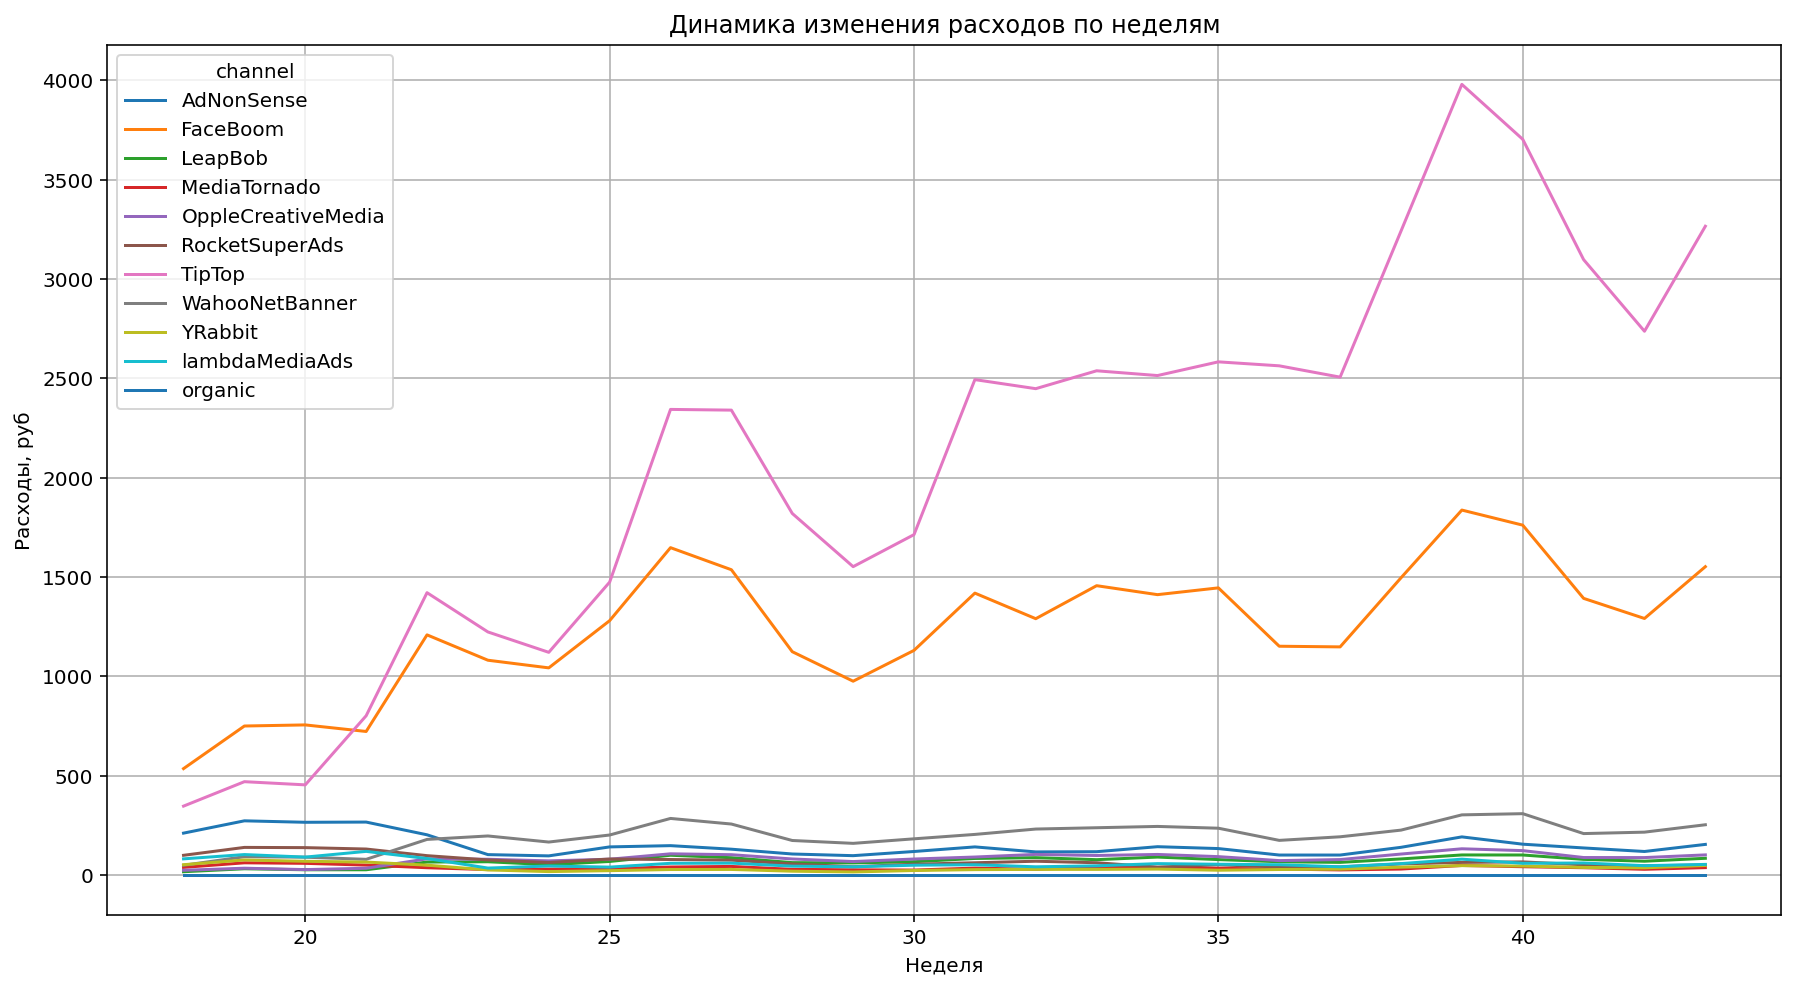

In [36]:
# В датафрейм profiles добавляем столбец 'week' с неделей года: 
profiles['week'] = profiles['first_ts'].dt.isocalendar().week

# Визуализируем динамику изменения расходов по неделям с помощью методов pivot_table() и plot()
profiles.pivot_table(index=profiles['week'], columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True,figsize=(15,8));

plt.ylabel('Расходы, руб');
plt.xlabel('Неделя');
plt.title('Динамика изменения расходов по неделям');

В целом, с 18 по 43 неделю расходы на привлечение пользователей через два наиболее популярных источника привлечения пользователей каналы TipTop и FaceBoom выросли. Хоть и наблюдалось некоторое снижение трат на рекламу через эти каналы на 24, 29 и 42 неделях, после снижения рост вновь продолжался. Больше всего денег на рекалму на этих каналах было потрачено на 39 неделе. Похожий рост с 18 по 43 неделю наблюдался и на менее популярном источнике привлечения - канале WahooNetBanner. Стоит омтетить ,что с 19 по 23 неделю снизились расходы на рекламу через канал AdNonSense и далее держались примерно на одном и том же уровне.	

In [37]:
# Удалим столбце 'week' из датафрейма profiles, так как в дальнейшем он больше нам не понадобится
profiles = profiles.drop(columns = ['week'],axis = 1)

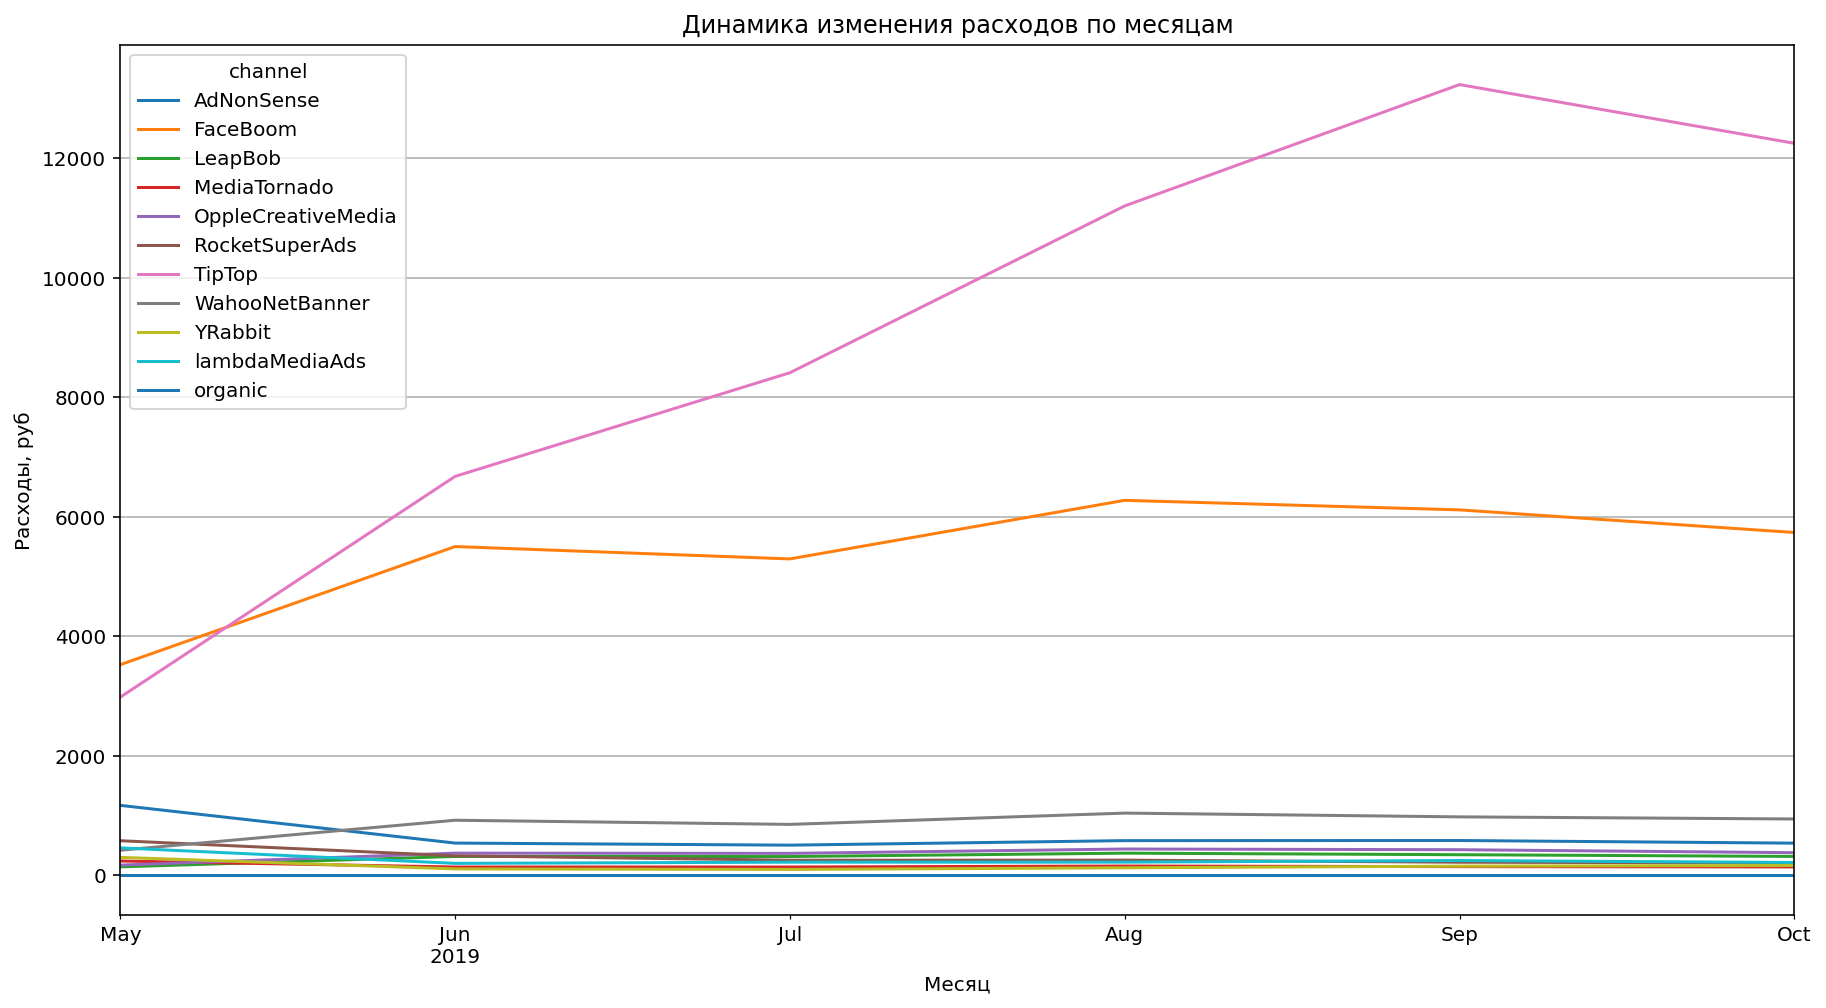

In [38]:
# Визуализируем динамику изменения расходов по неделям с помощью методов pivot_table() и plot()
profiles.pivot_table(index=profiles['month'], columns='channel', values='acquisition_cost', aggfunc='sum').plot(grid=True,figsize=(15,8));

plt.ylabel('Расходы, руб');
plt.xlabel('Месяц');
plt.title('Динамика изменения расходов по месяцам');

Расходы на привлечение пользователей через канал TipTop значительно выросли с мая по сентябрь (более чем в 4 раза), в котором была потрачена максимальная сумма на рекламу за 1 месяц - около 13 000 руб, снизившаяся в октябре почти до 12000 руб. Рост расходов на привлечение пользователей с мая по август (с 3500 до 6200 руб) наблюдался и на канале FaceBoom. С августа по сентябрь расходы на привлечение пользователей через этот канал снизились до 5800 руб в месяц. Расходы на другие каналы не превышали 1000 рублей в месяц и в значительной мере не изменялись во времени, лишь с мая по июнь снизились траты на канал AdNonSense и выросли траты на канал WahooNetBanner.

### Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника

In [39]:
# Сгруппируем датафрейм profiles по столбцу с каналами привлечения 'channel' методом groupby(), и посчитаем методом mean () по 
# столбцу 'acquisition_cost', сколько стоило привлечение одного пользователя из каждого истончика
(
    profiles.groupby('channel').agg({'acquisition_cost': 'mean'}).rename(columns={'acquisition_cost': 'CAC'})
                                                             .sort_values(by='CAC', ascending=False).round(2)
)


CAC
channel                 
TipTop              2.80
FaceBoom            1.11
AdNonSense          1.01
lambdaMediaAds      0.72
WahooNetBanner      0.60
RocketSuperAds      0.41
OppleCreativeMedia  0.25
YRabbit             0.22
MediaTornado        0.22
LeapBob             0.21
organic             0.00

In [40]:
# Посчитаем средний САС по проекту: 
round(profiles['acquisition_cost'].sum()/ len(profiles['user_id']),2)

0.7

Средний САС по проекту составил 0,7 руб за одного пользователя.

Самое дорогое привлечение пользователей через канал TipTop, в среднем 2,8 руб за одного пользователя. На втором месте канал FaceBoom, стоимость привлечения одного пользователя через который в 2,5 раза ниже - 1,11 руб. Замыкает тройку самых дорогих каналов AdNonSense со средней стоимостью 1,01 руб за одного пользователя. Дешевле других обошлось привлечение пользователей через канал LeapBob (0,21 руб) и каналы MediaTornado и YRabbit (по 0,22 руб). 

*Выводы по разделу 4:*

- Общие расходы на маркетинг за рассматриваемый период - 105497.3 руб. Большая часть из этой суммы потрачена на привлечение пользователей через каналы TipTop (54751.30 руб) и FaceBoom (32445.60 руб), расходы на которые, соотвественно, значительно увеличили с мая по октябрь по сравнению с другими каналами, расходы на которые не изменяли с июля по октябрь; 
- У канала TipTop самое дорогое привлечение одного пользователя - в среднем 2,8 руб. На втором месте канал FaceBoom с 1,11 руб за одного пользователя. Самые дешевые каналы для привлечения пользователей каналы LeapBob, MediaTornado и YRabbit: не более  0,22 руб за одного пользователя; 
- Средний САС по проекту составил 0,7 руб за одного пользователя.  


## Оценим окупаемость рекламы

Используя графики LTV, ROI и CAC, проанализируем окупаемость рекламы.  

Считаем, что на календаре 1 ноября 2019 года, а в бизнес-плане заложено, что пользователи должны окупаться не позднее чем через две недели после привлечения.

In [41]:
# Установим момент и горизонт анализа данных
observation_date = datetime(2019, 11, 1).date()  # момент анализа
horizon_days = 14  # горизонт анализа 


Органических пользователей исключим из анализа, так как на их привлечение не было потрачено никаких денег.

In [42]:
# Сделаем срез методом query() для исключения органических пользователей из датафрейма
profiles = profiles.query('channel != "organic"')

### Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графиков динамики LTV, CAC и ROI.

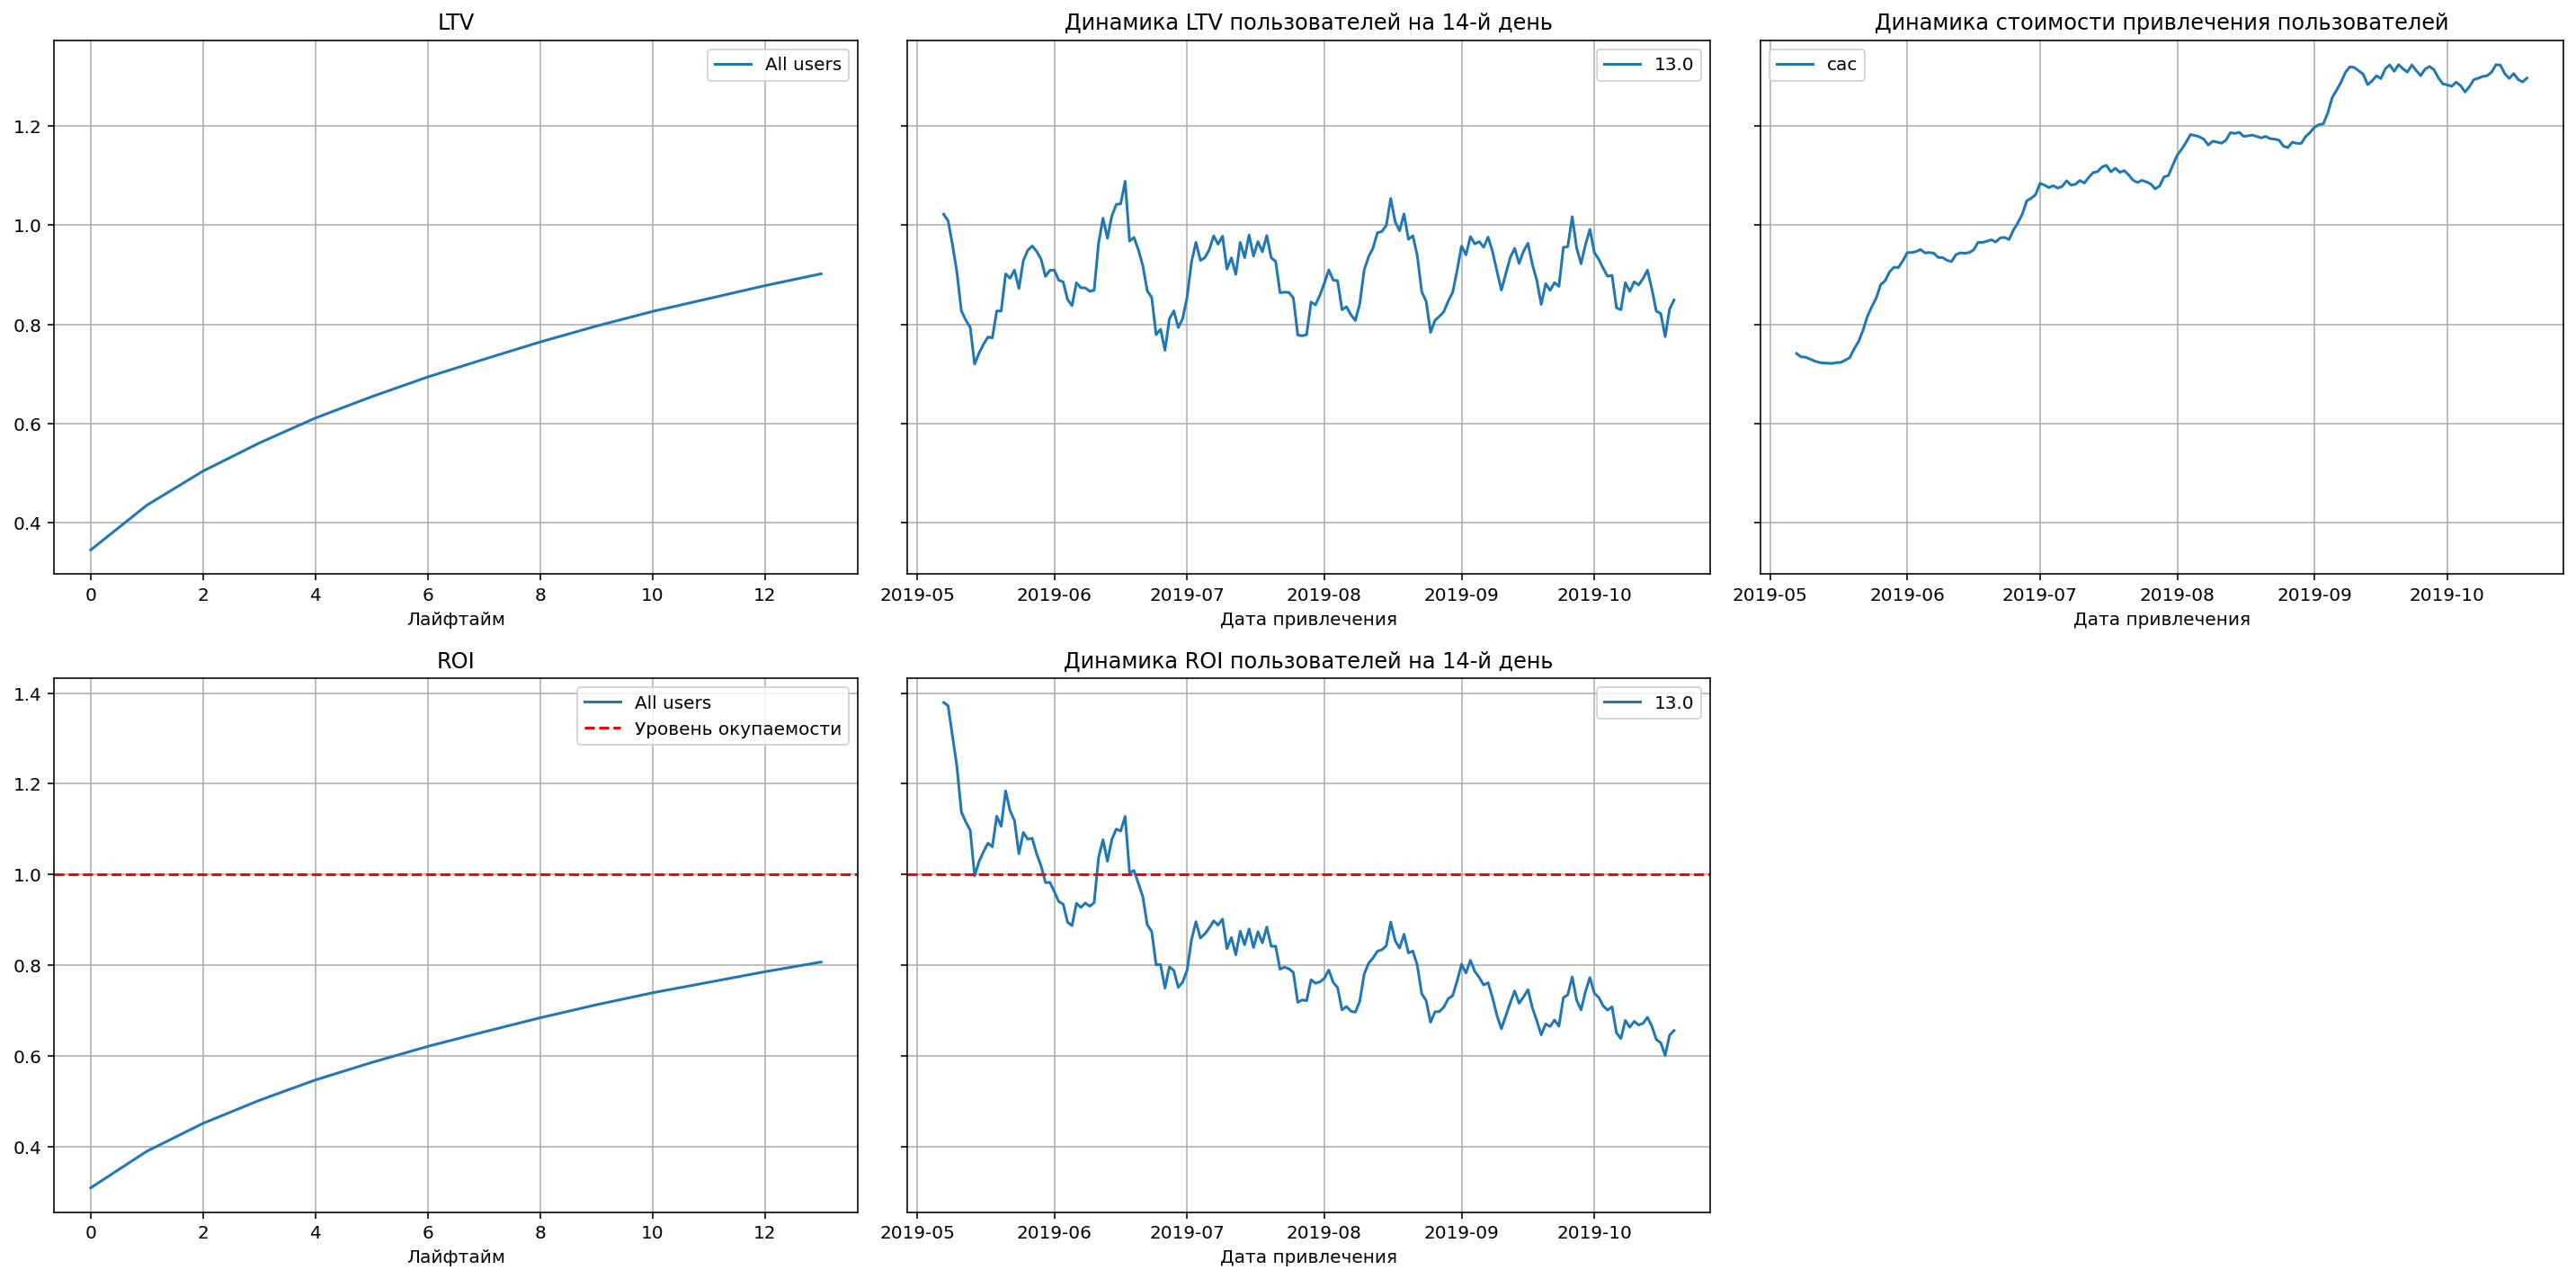

In [43]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

По полученным графикам можно сделать следующие выводы:

- На LTV пользователей влияет сезонный фактор, но несмотря на это он достаточно стабилен. Значит, дело не в ухудшении качества пользователей.
- Реклама не окупается. ROI в конце второй недели не превышает 80 %. Динамика ROI пользователей на 14-й день снижается с мая по октябрь в 2,3 раза с 1,4 до 0,6, а начиная с середины июня уровень окупаемости уже не достигается;
- CAC растет, значит причина неокупаемости рекламы может быть связана с увеличением рекламного бюджета;


### Проверим конверсию пользователей и динамику её изменения. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания

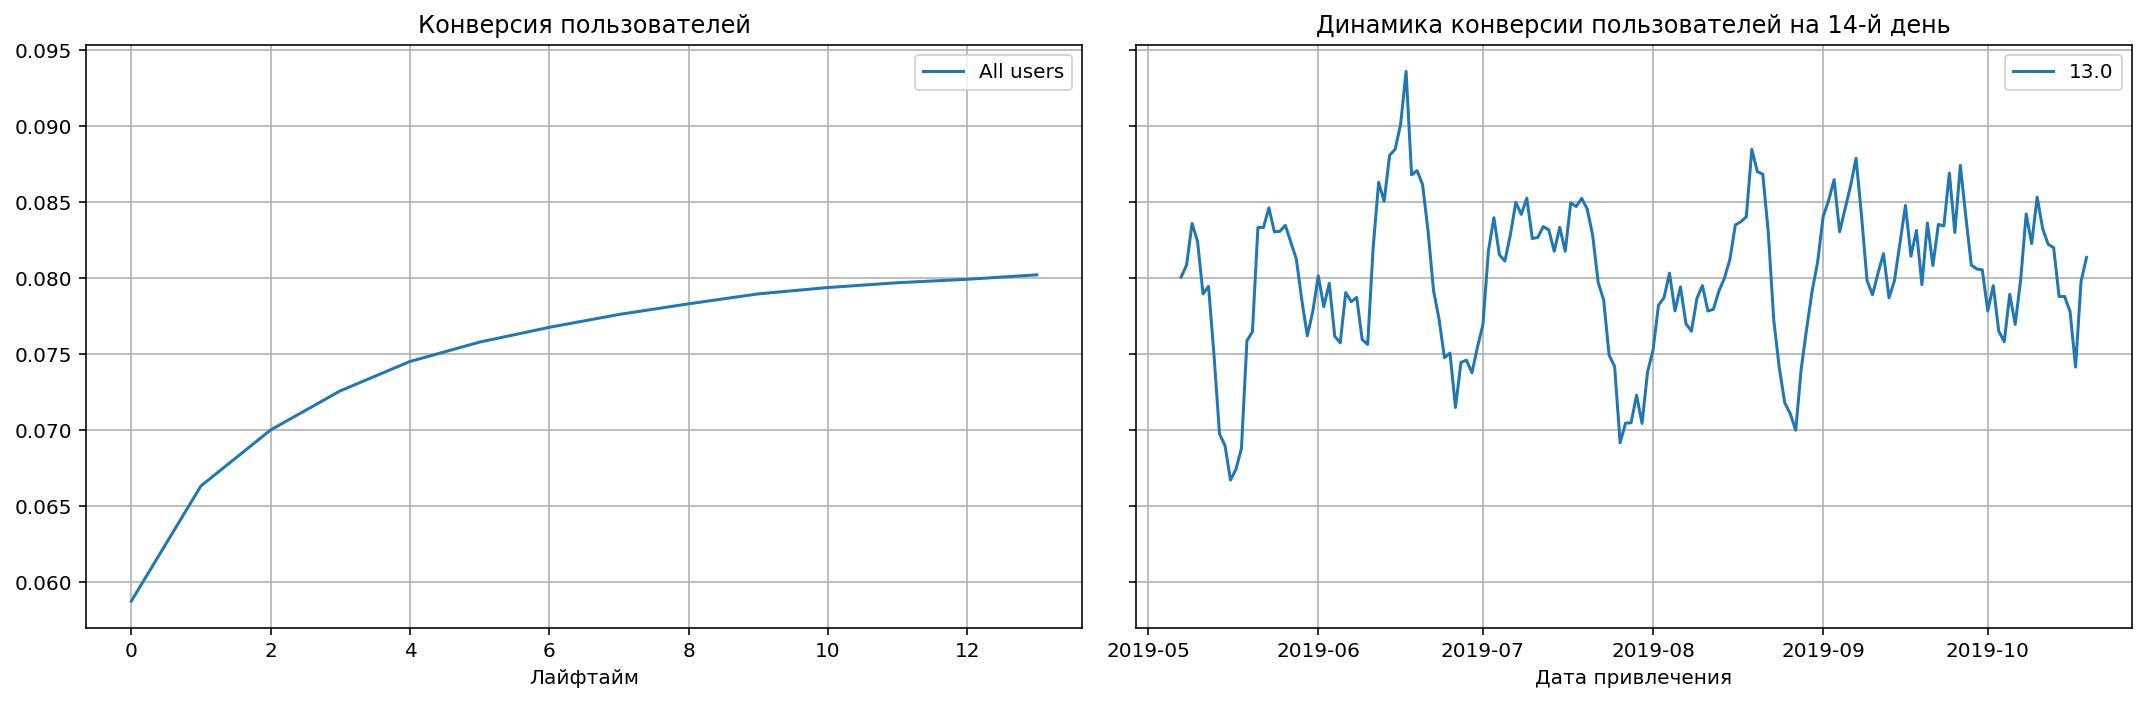

In [44]:
# смотрим конверсию 
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей небольшая, но растет. За 14 дней она выросла чуть более, чем на 2 % и составляет всего около 8 %. Динамика конверсии пользователей за 14 дней с мая по октябрь в среднем также близка к 8 %, минимальное значение коверсии при этом было в мае и составило около 6,7 %, а максимальное (9,4 %) - в июне.

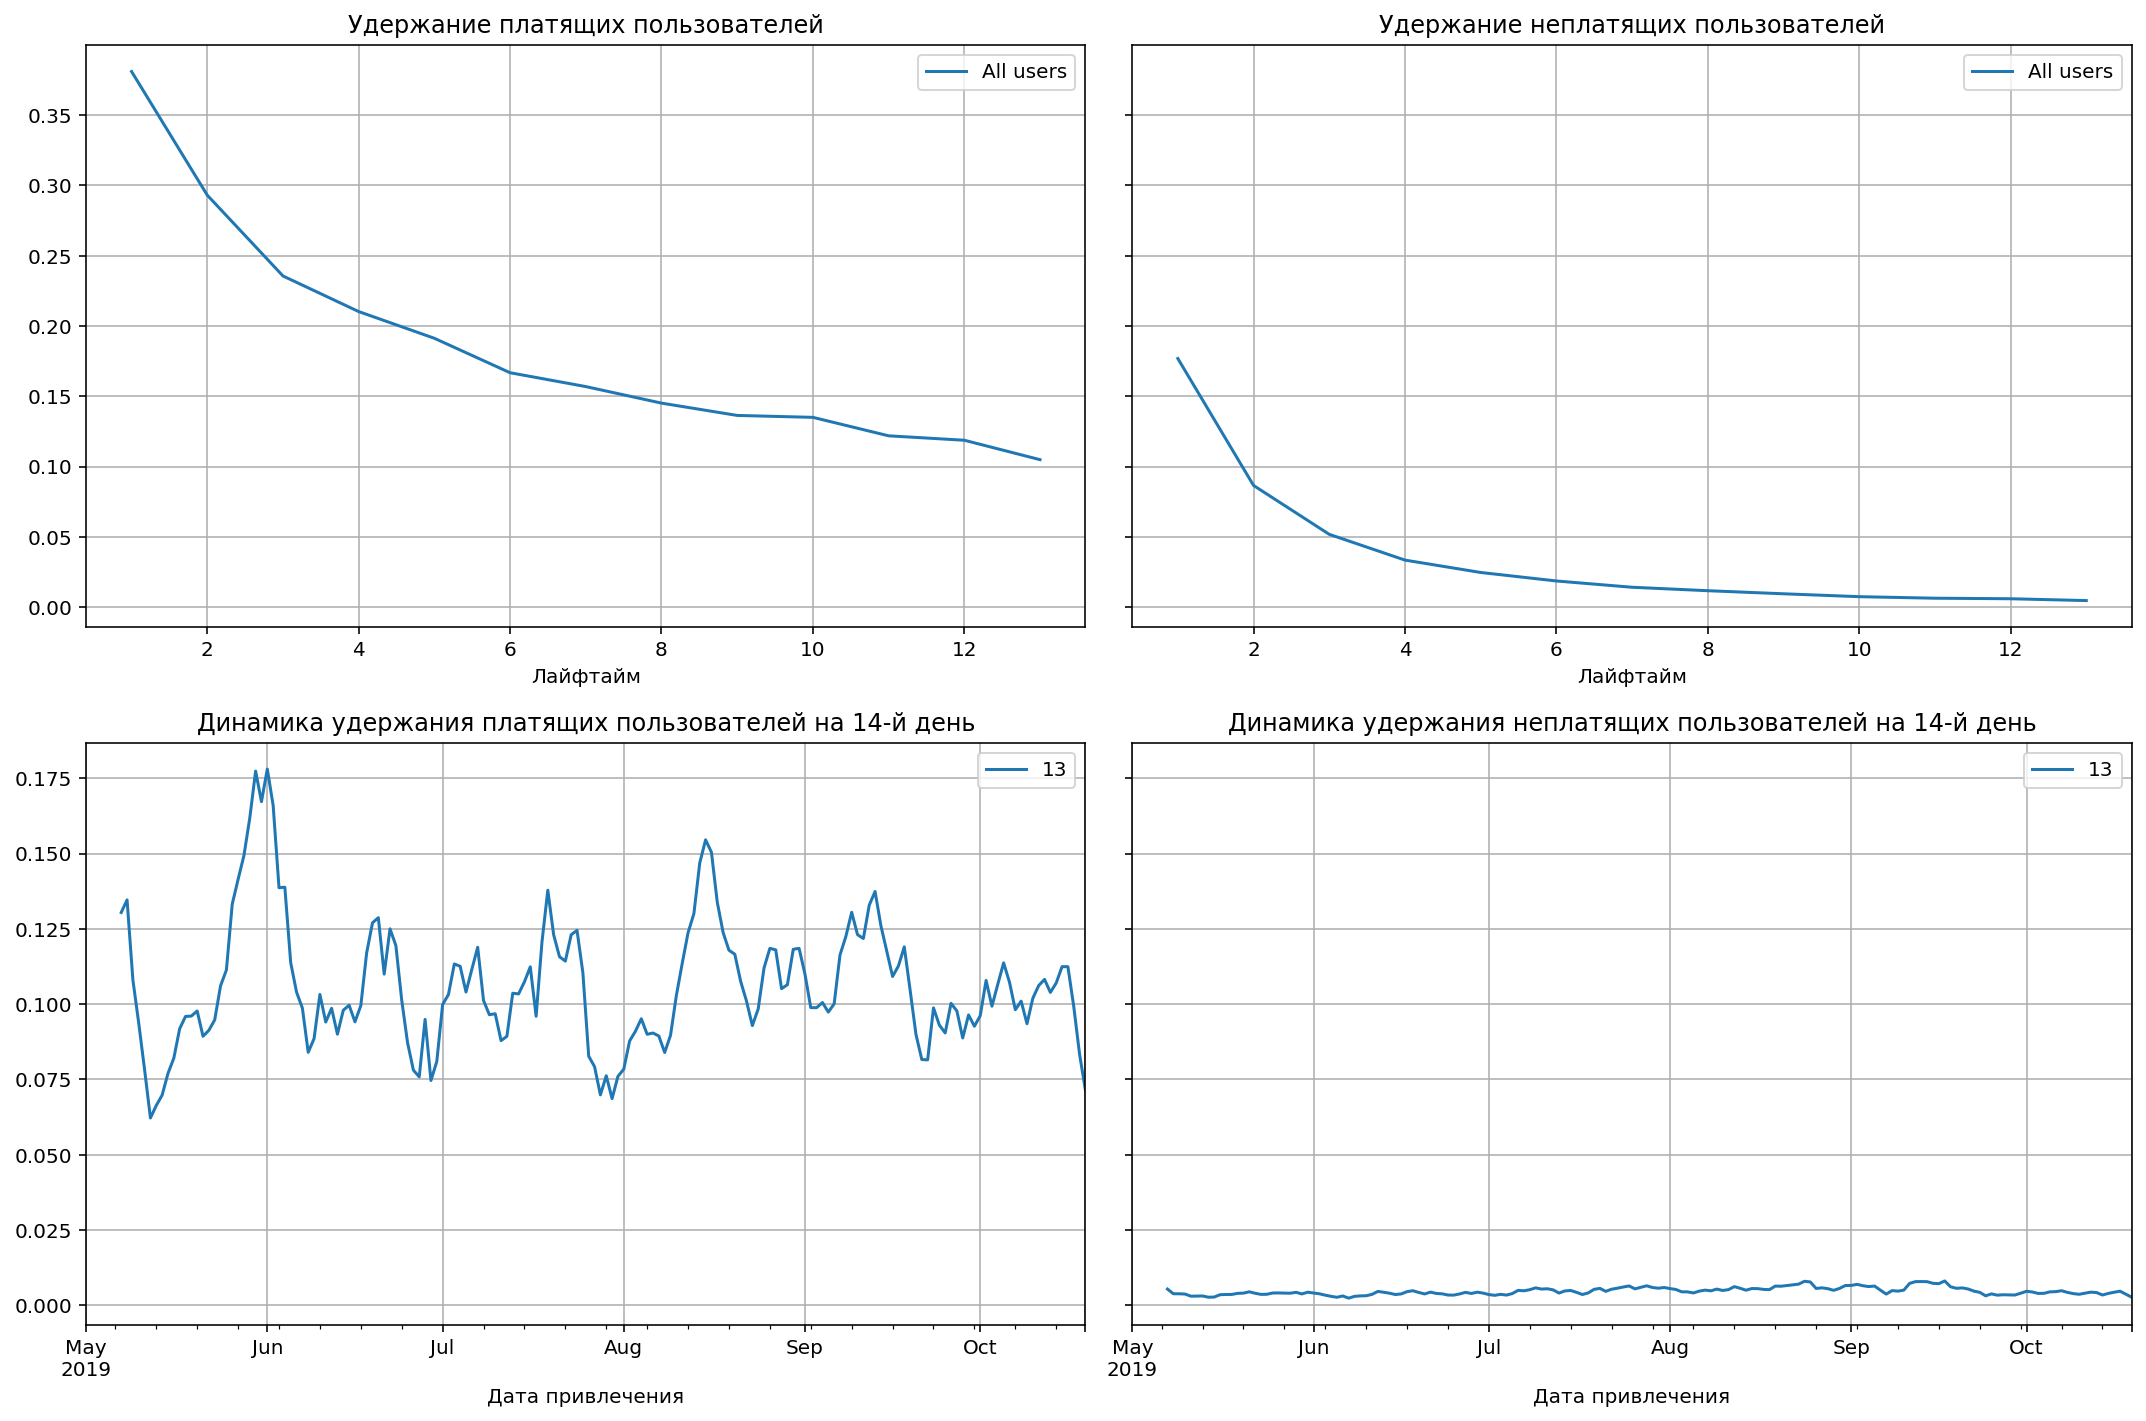

In [45]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days
)

plot_retention(retention_grouped, retention_history, horizon_days) 

Удержание платящих пользователей лучше, чем удержание неплатящих. Удержание платящих пользователей снижается на 27 %, наиболее сильное падение наблюдается с 1 по 6 лайфтайм, в эти же период наблюдается и сильное снижение удержания неплатящих пользователей с 17 до 8 %, которое приближается к нулю на 14 день. Динамика удержания платящих пользователей на 14 день с мая по октябрь в среднем стабильна и составляет 10 %, достигая минимального значения (6 %) в первой половине мая и максимального значения (17,5 %) в конце мая - в начале июня. Динамика удержания неплатящих пользователей на 14 день с мая по октябрь стабильно низка и не превышает 1 %.

### Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

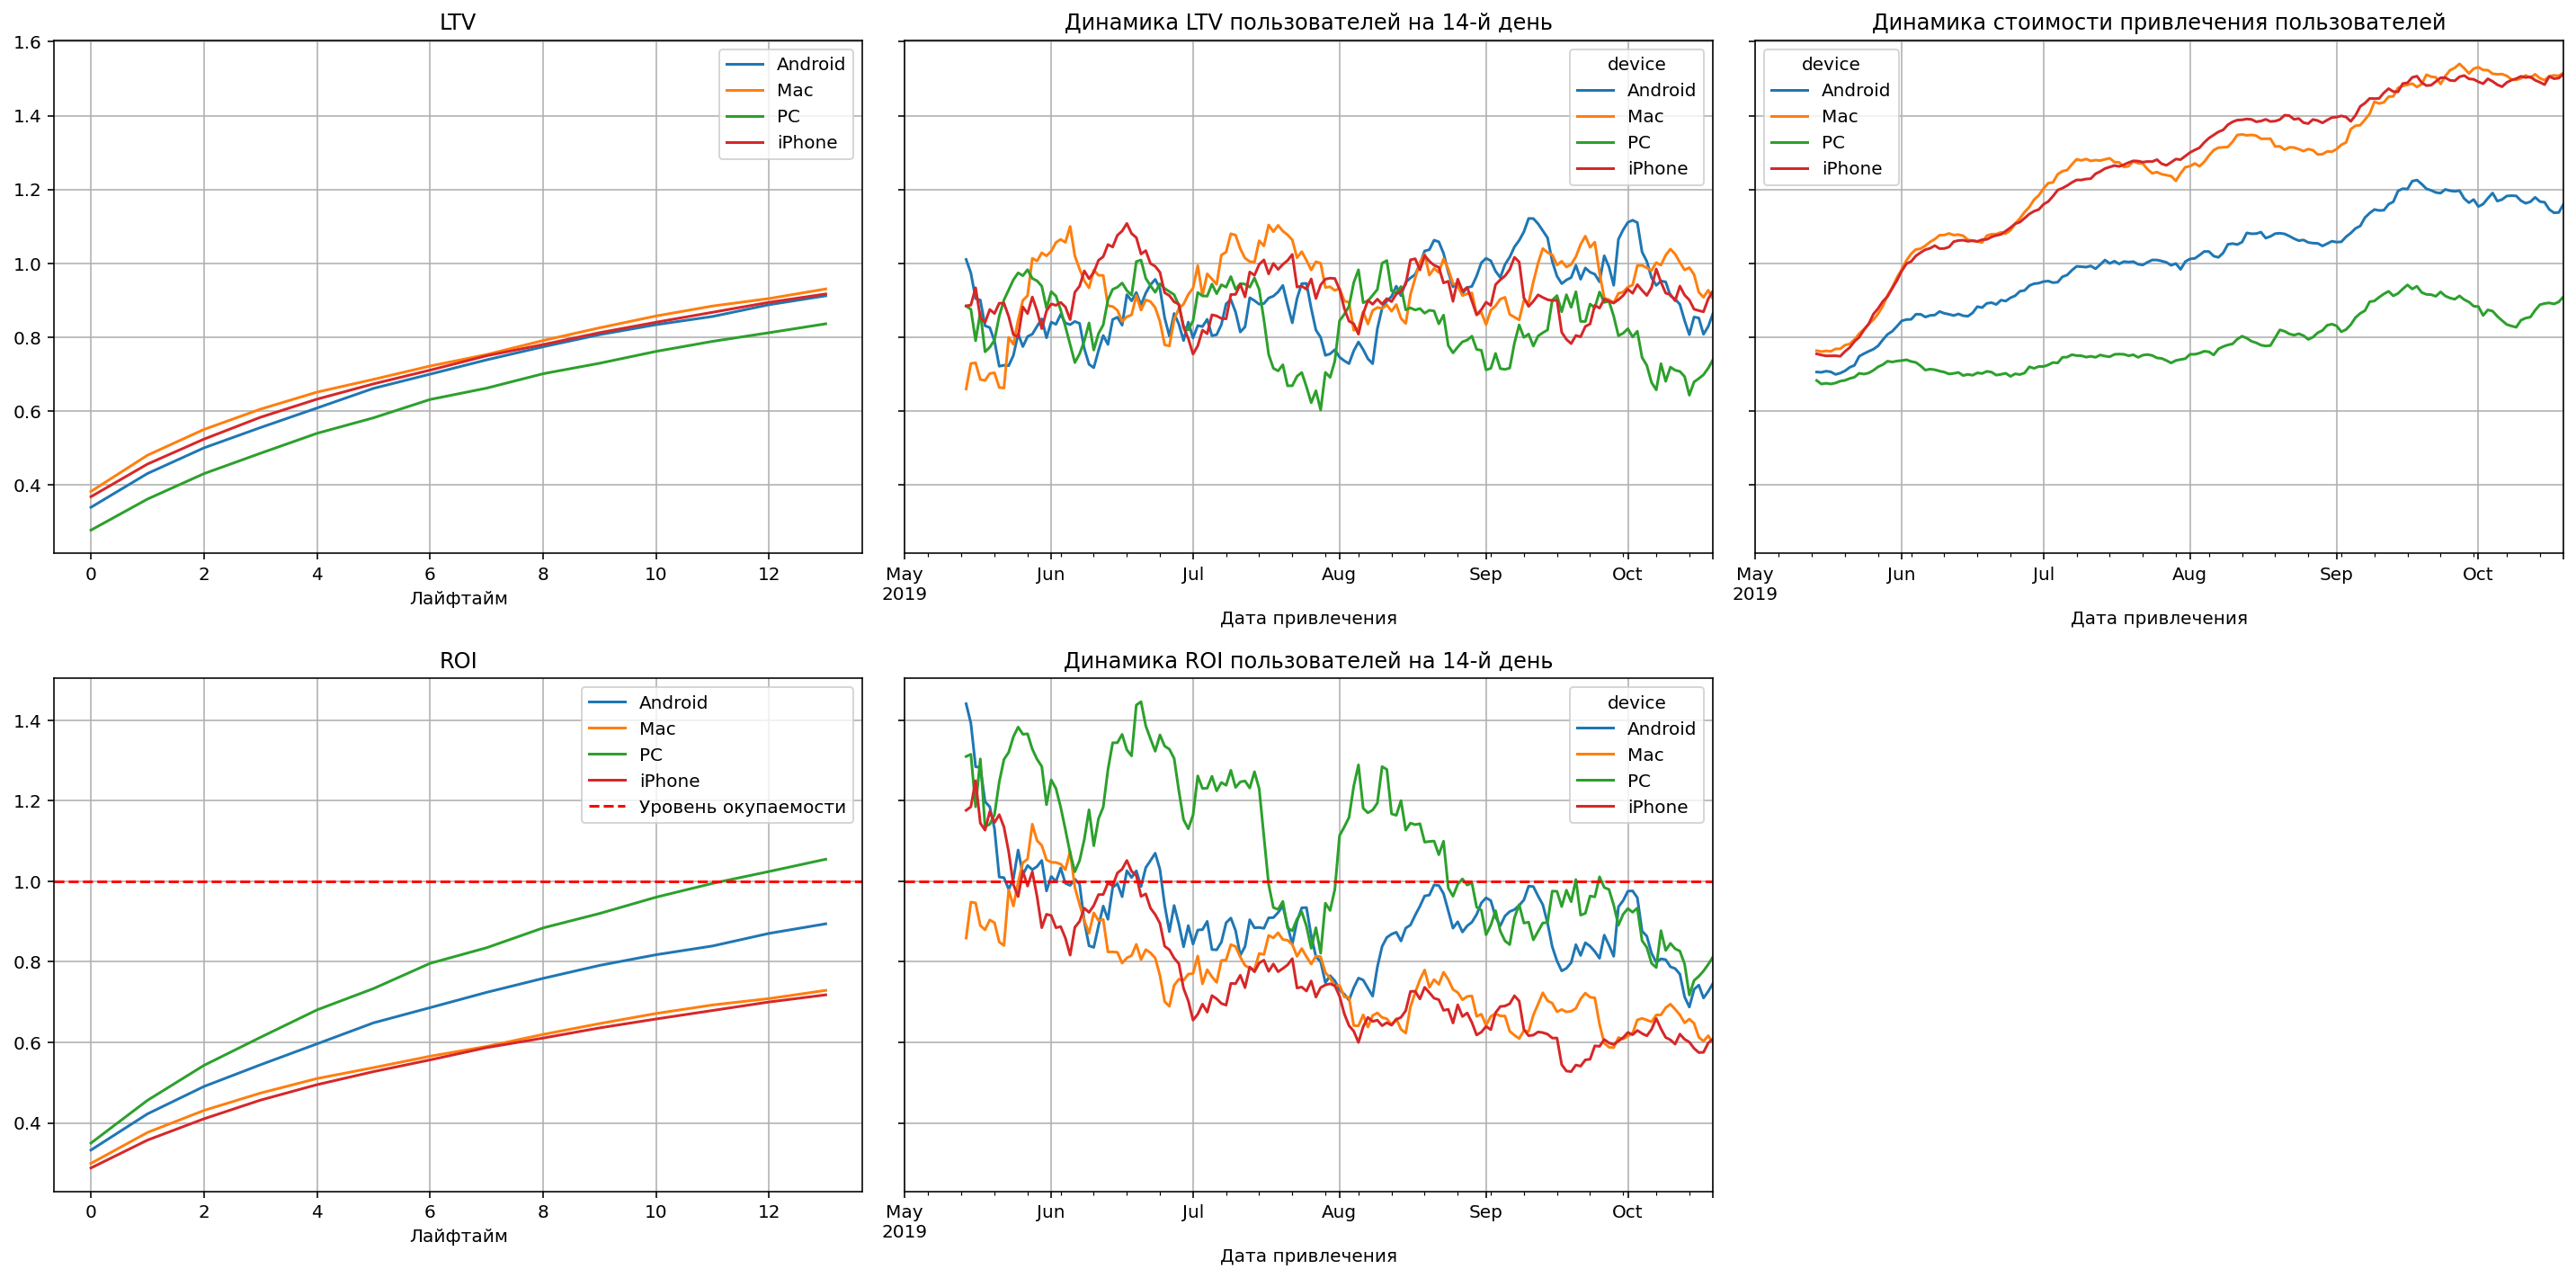

In [46]:
# смотрим окупаемость с разбивкой по устройствам
dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- LTV все также подвержен сезонности, но стабилен. При этом стоит отметить, что LTV пользователей ПК несколько ниже, чем у пользователей всех остальных устройств;
- Стоимость привлечения пользователей с мая по октябрь увеличивалась на всех устройствах, в большей степени на Mac и IPhone, в меньшей - на ПК;
- Только пользователи ПК стабильно окупаются (начиная с 12 дня), в отличие от всех остальных платформ, среди которых пользователи Android окупаются лучше, чем пользователи Mac и IPhone. Снижение динамики ROI пользователей на 14 день с мая по сентябрь на всех устройствах может быть связано с ростом стоимости привлечения новых пользователей на них в этот же период.

### Проанализируем окупаемость рекламы с разбивкой по странам. Постройте графики LTV и ROI, а также графики динамики LTV, CAC и ROI

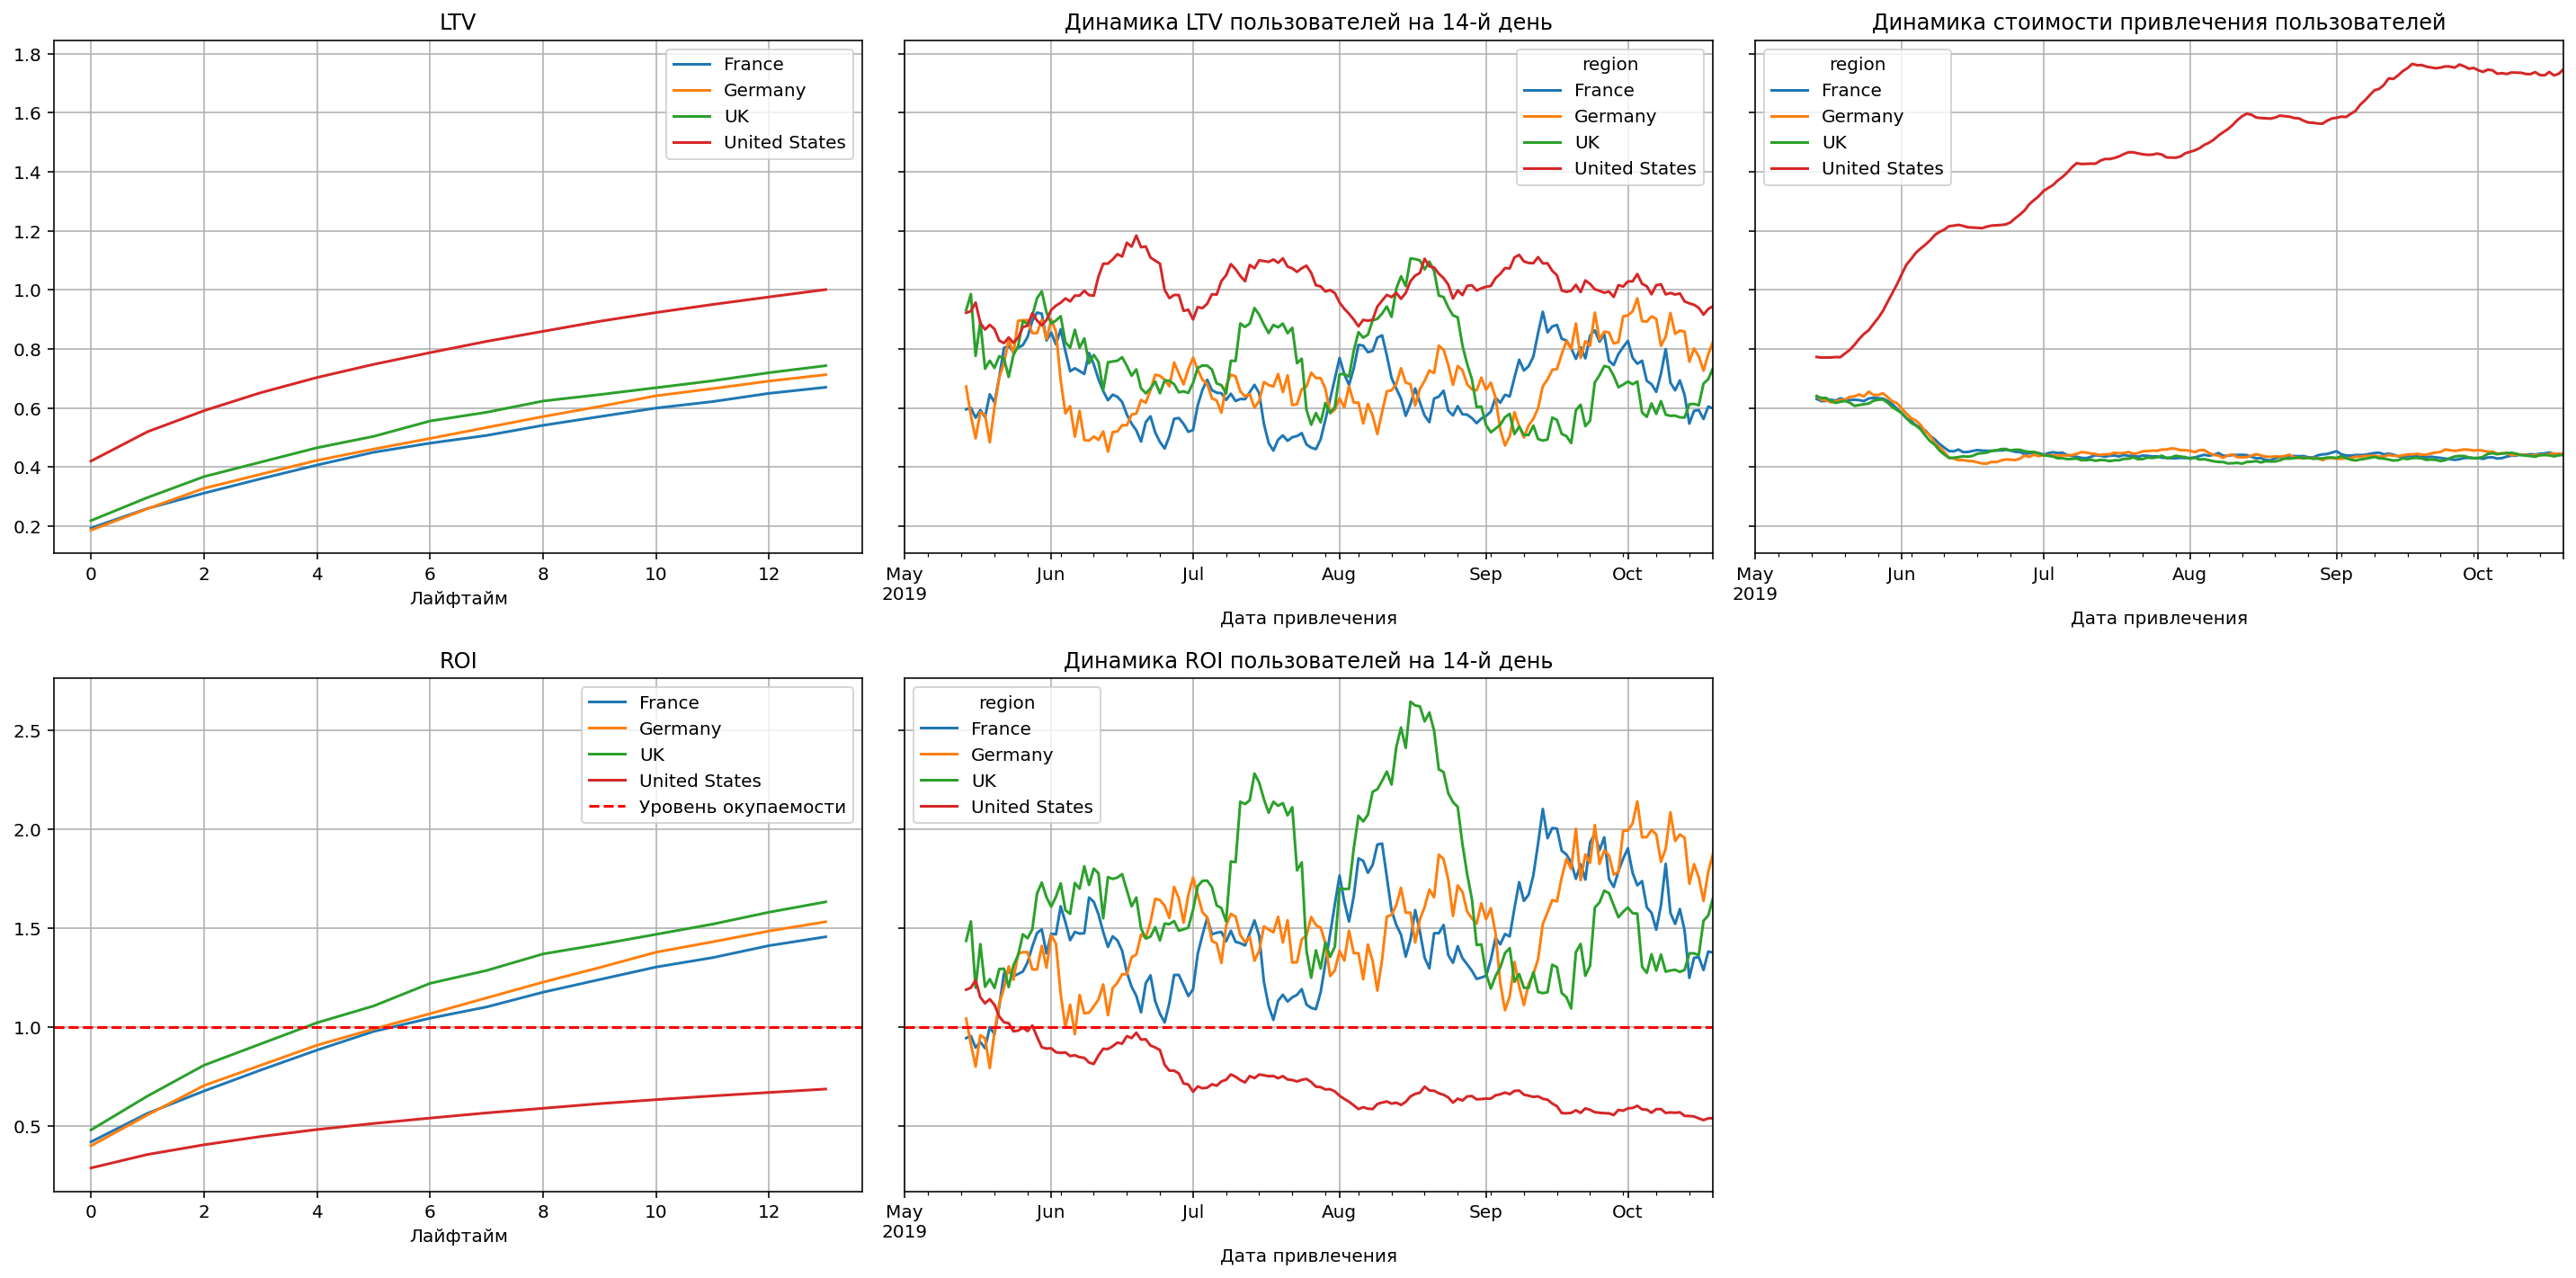

In [47]:
# смотрим окупаемость с разбивкой по странам

dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

LTV пользователей из всех стран стаблен, при этом LTV пользователей из США выше, чем из других стран. В то же время пользователи из США не окупаются, несмотря на некоторый рост с 1 по 14 день, уровень окупаемости пользователей из этой страны самый низкий, на 14 день он едва превышает 60 %. Пользователи из остальных стран полностью окупаются уже на 5-6 день. ROI пользователей на 14-й день с мая по сентябрь из всех стран, кроме США, достаточно стабилен, самый высокий уровень окупаемости у пользователей из Великобритании с пиком в августе (более 250 %). У пользователей из США динамика ROI на 14 день c мая по июль снижается практически в два раза, что в том числе может быть связано с  ростом трат на привлечение пользователей из этой страны более, чем в 2 раза. При всем при этом в данный период были снижены траты на привлечение пользователей из других стран, пользователи из которых полностью окупаются.

### Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI

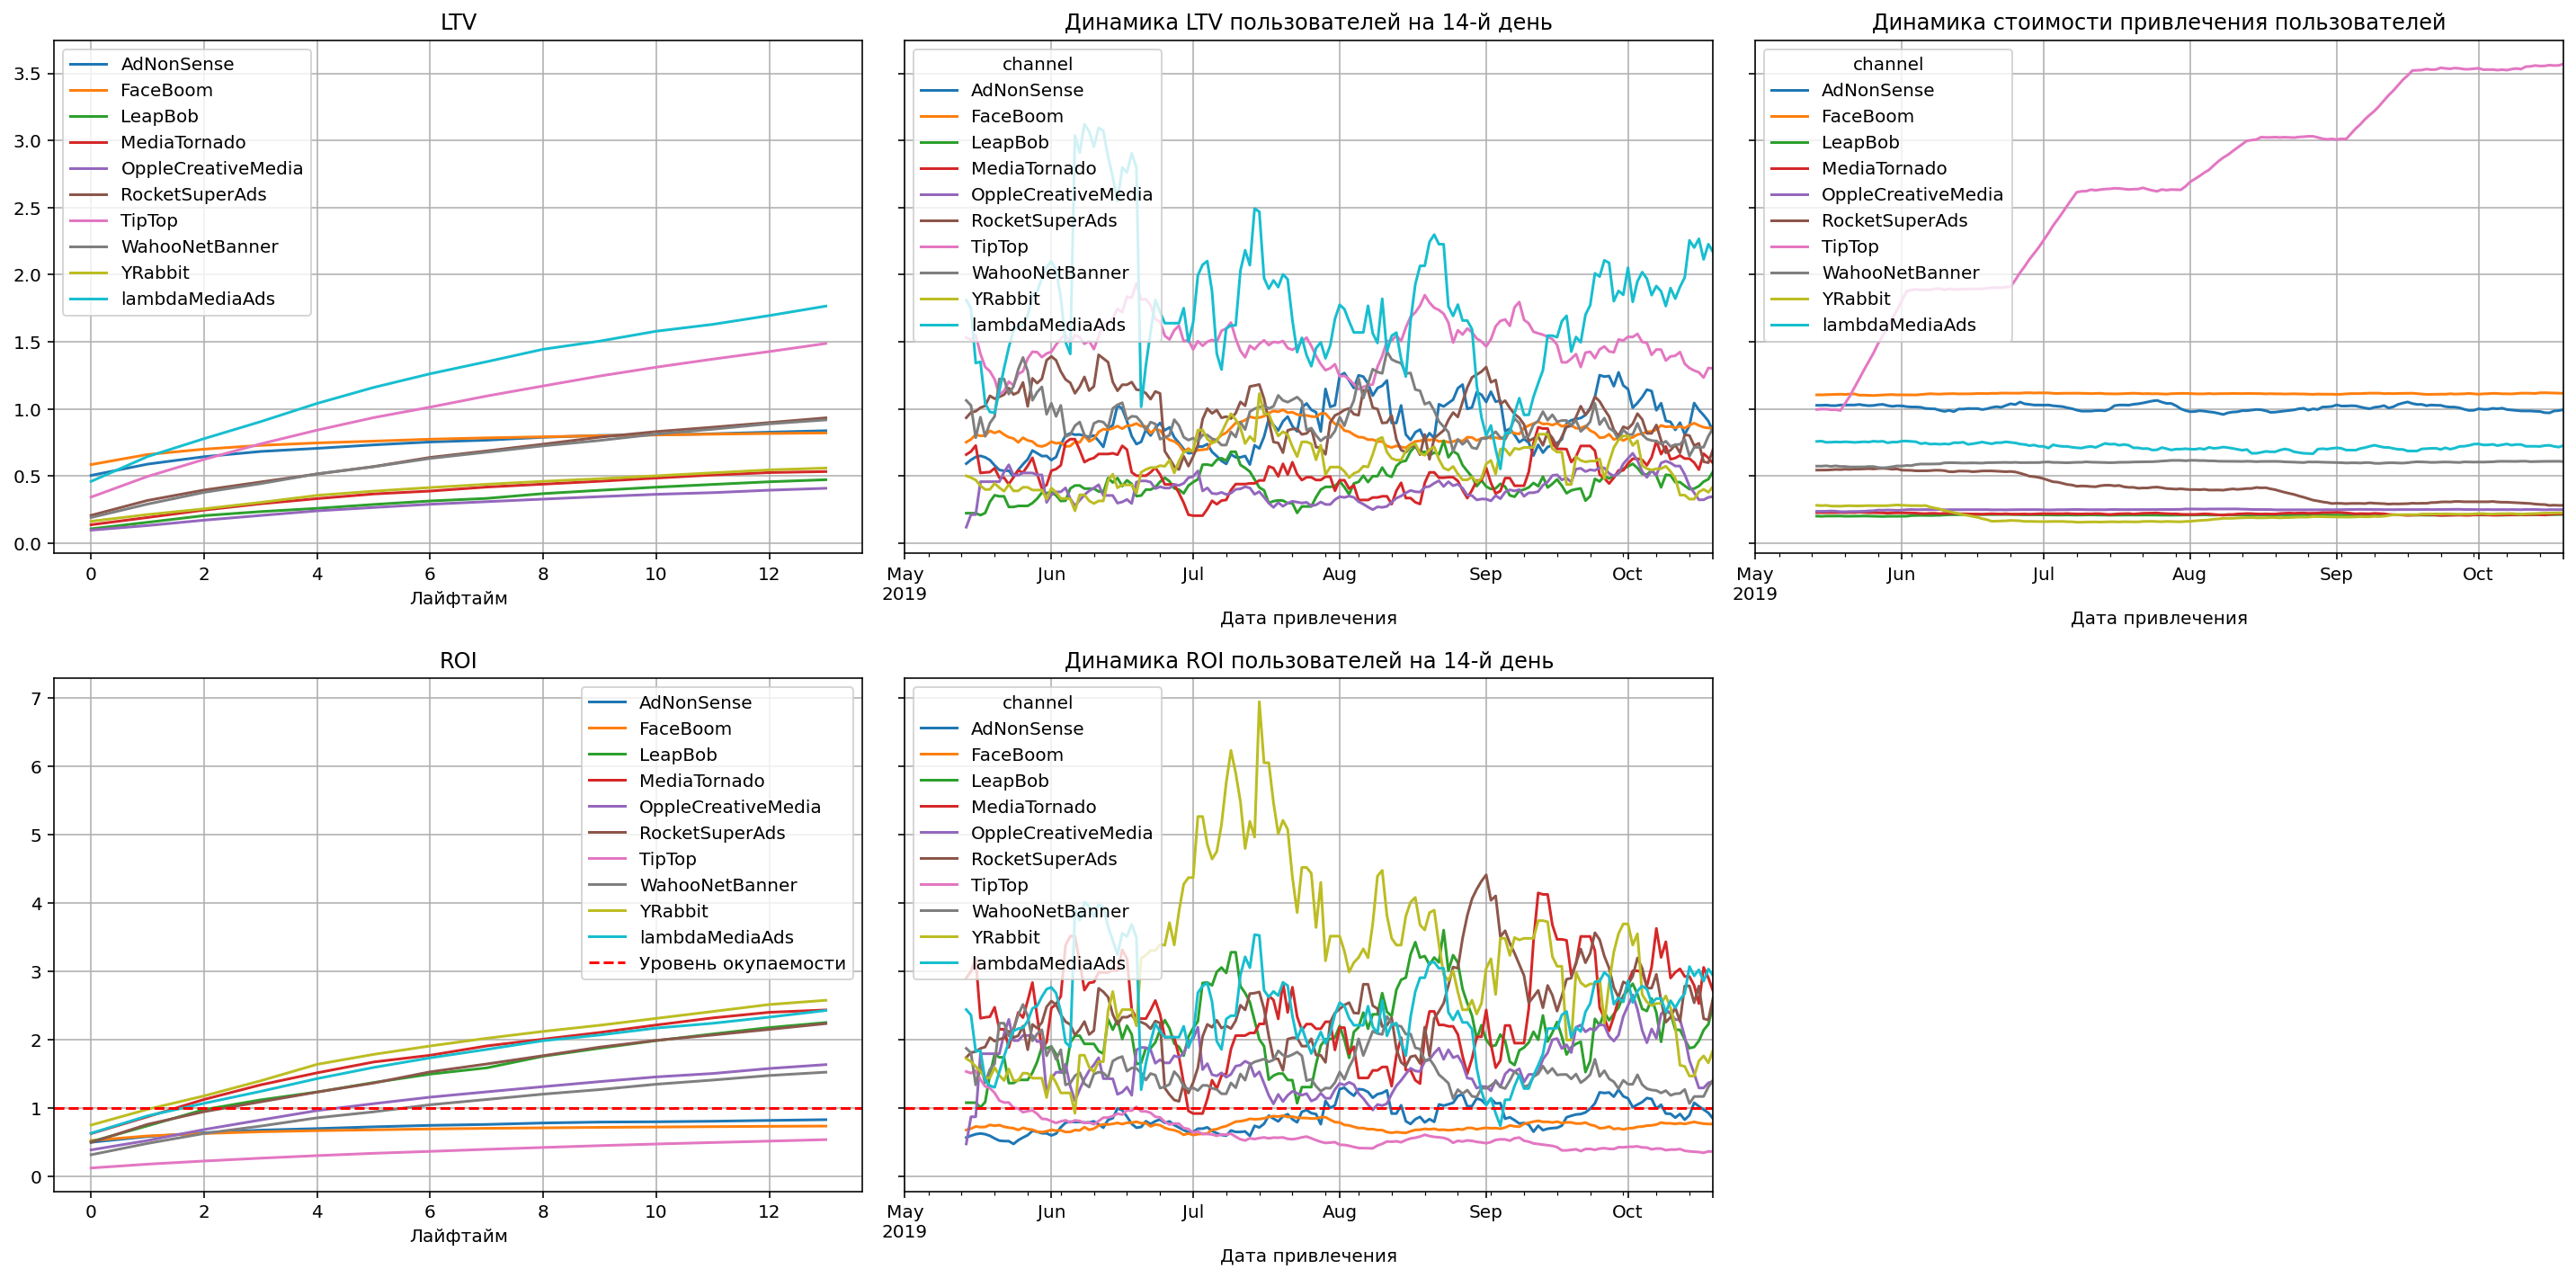

In [48]:
# смотрим окупаемость с разбивкой по рекламным каналам

dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
)

- LTV пользователей,привлеченных через все каналы, растет. Хоть этот показатель и подвержен сезонности, он стабилен в динамике с мая по октябрь. Однако на каналах lambdaMediaAds и TipTop наблюдается более активный рост качества пользователей, в особенности на первом из них, сильный скачок LTV пользователей на котором наблюдался в июле. 
- Только пользователи, привлеченные через каналы TipTop,FaceBoom,AdNonSense, не окупаются. В то же самое время, как было определено ранее, именно на привлечение пользователей через эти каналы было потрачено больше всего денег, и именно через них самое дорогое привлечение пользователей. При этом с мая по сентябрь, с каждым месяцем увеличивалось вложение денежных средств только в рекламу через канал TipTop, так по сравнению с маем в октябре в рекламу через этот канал вложили практически в 3,5 раза больше денег. На всех остальных платформах, траты на рекламу практически не изменялись, лишь на канале RocketSuperAds они снизились в 1,5-2 раза с мая по сентябрь.

### Проверим конверсию пользователей и динамику её изменения с разбивкой по устройствам. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

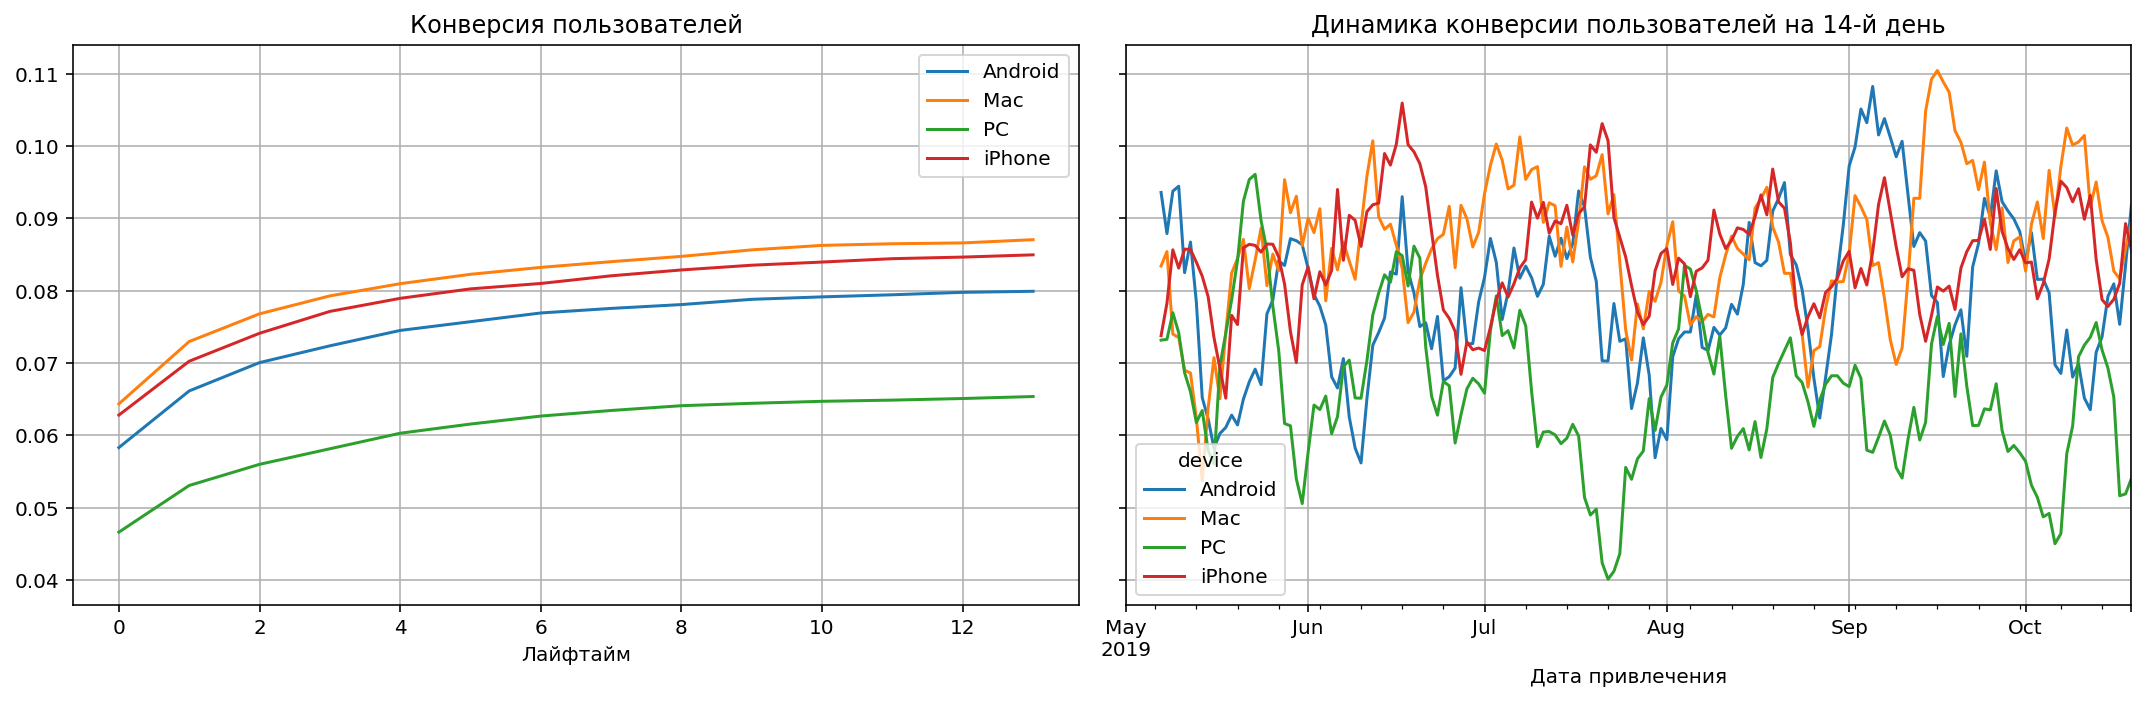

In [49]:
# смотрим конверсию с разбивкой по устройствам
dimensions = ['device']

conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Как видно из полученных данных, лучше всего конвертируются пользователи Mac и iPhone (около 8,5 % на 14 день), чуть хуже пользователи Android (8 %), а меньше всего конверсия у пользователей ПК (6,5 %). 

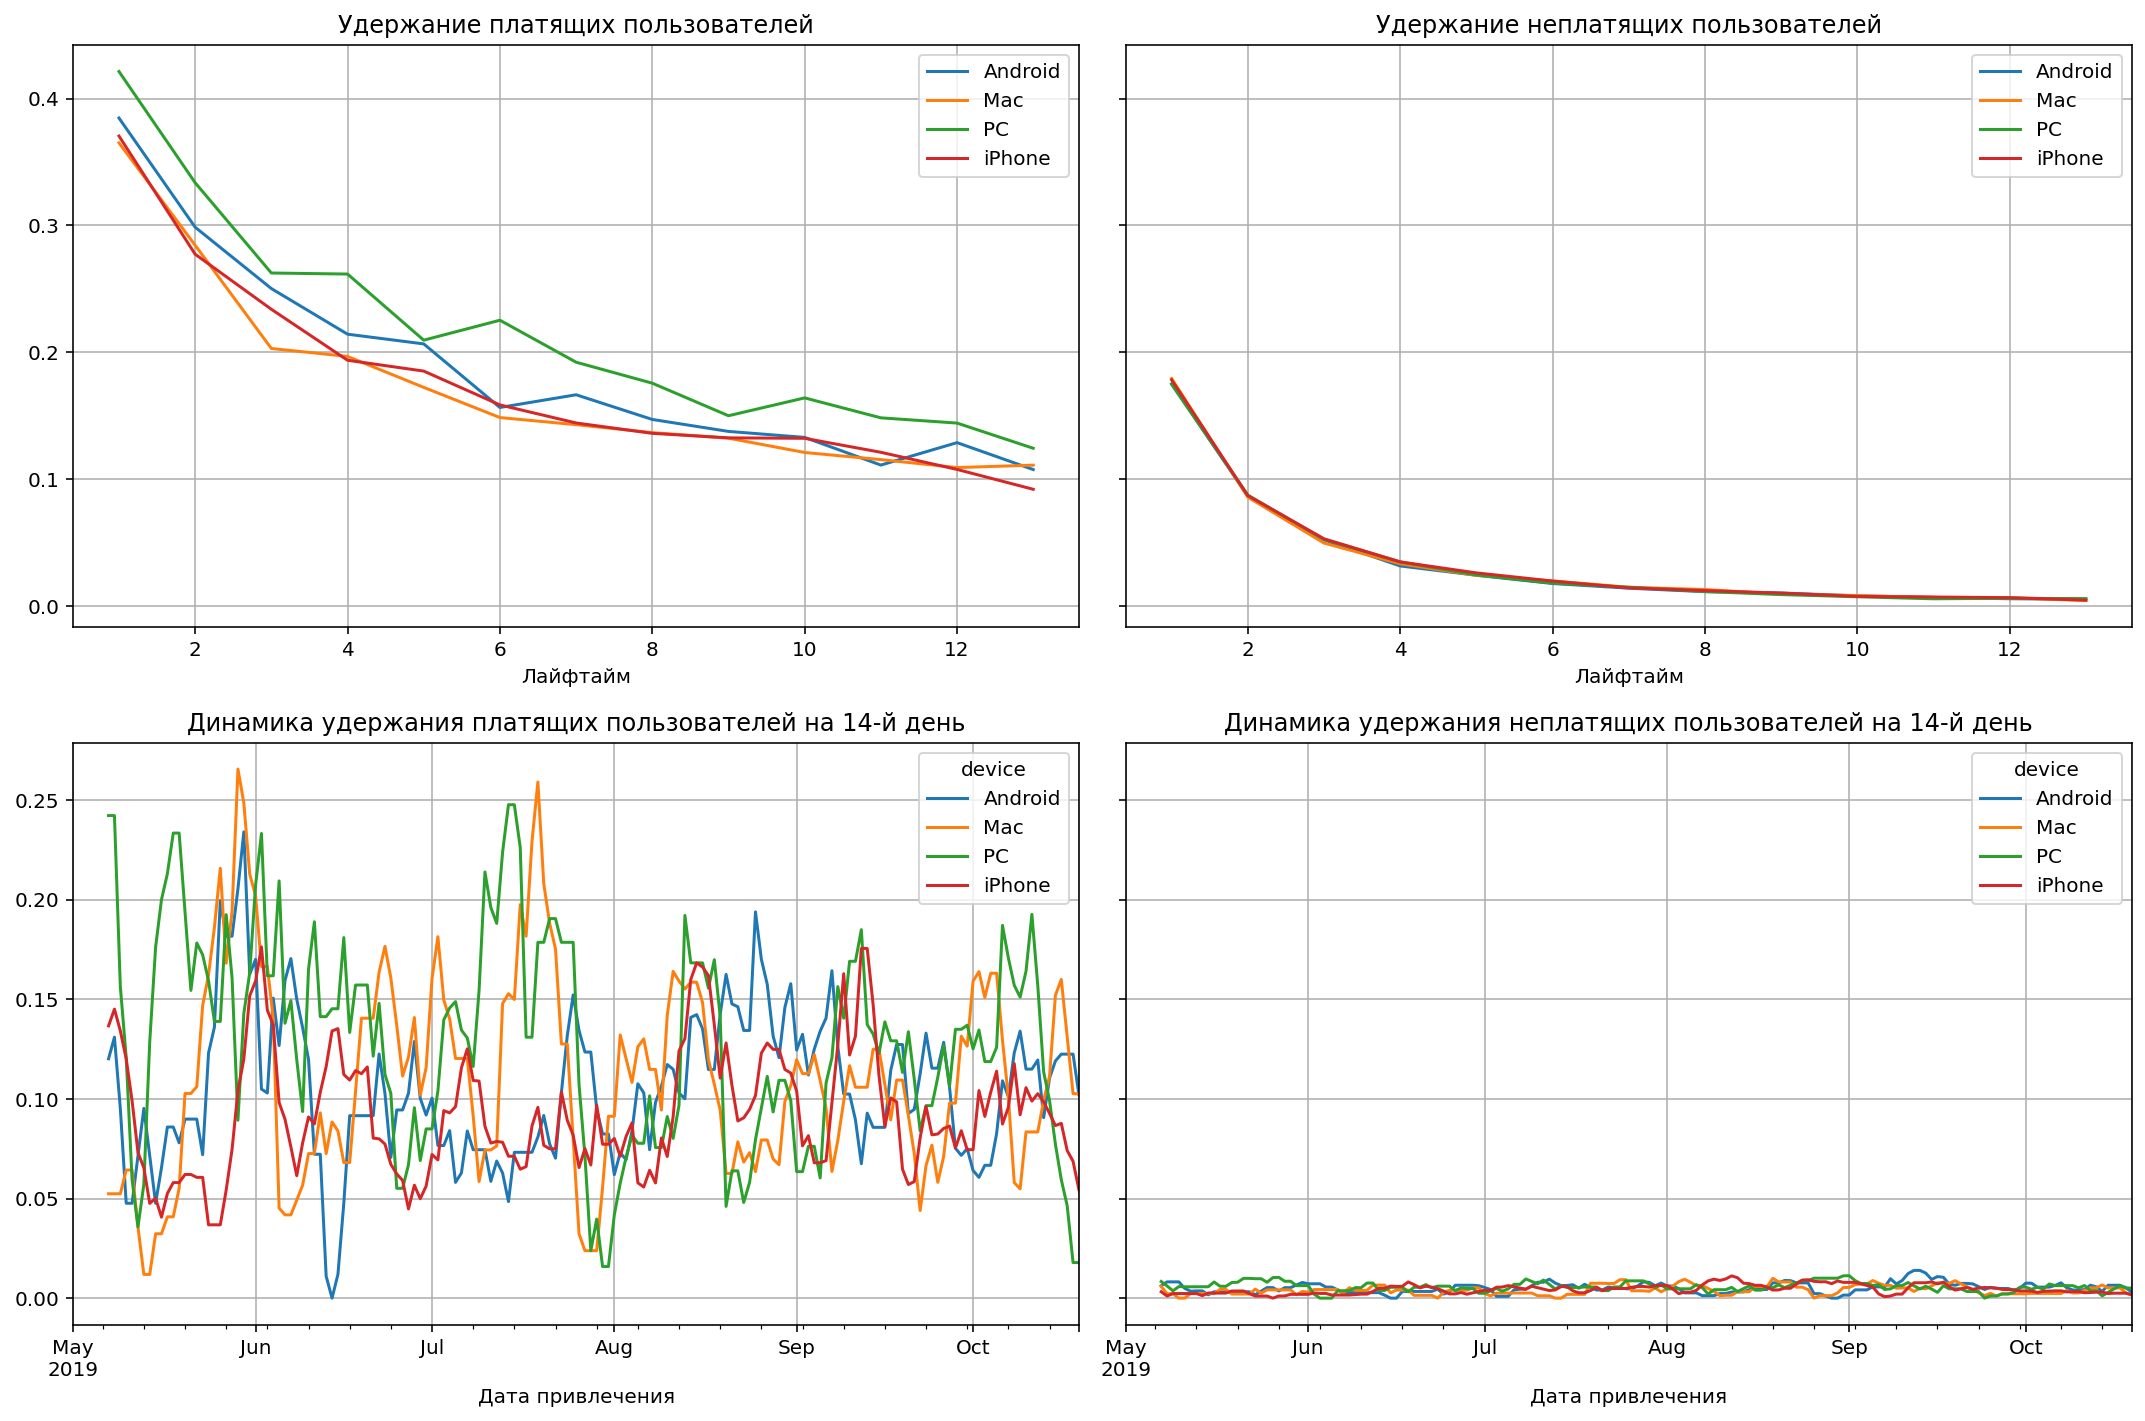

In [50]:
# смотрим удержание с разбивкой по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

На графиках удержания наблюдается несколько иная картина: лучше всего на 14 день удерживаются платящие пользователи ПК  (13 %), а хуже всего пользователи iPhone (9 %). Удержание неплатящих пользователей ниже, чем платящих, и практически одинаково на всех устройствах (около 1 % на 14 день).   

### Проверим конверсию пользователей и динамику её изменения с разбивкой по странам. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

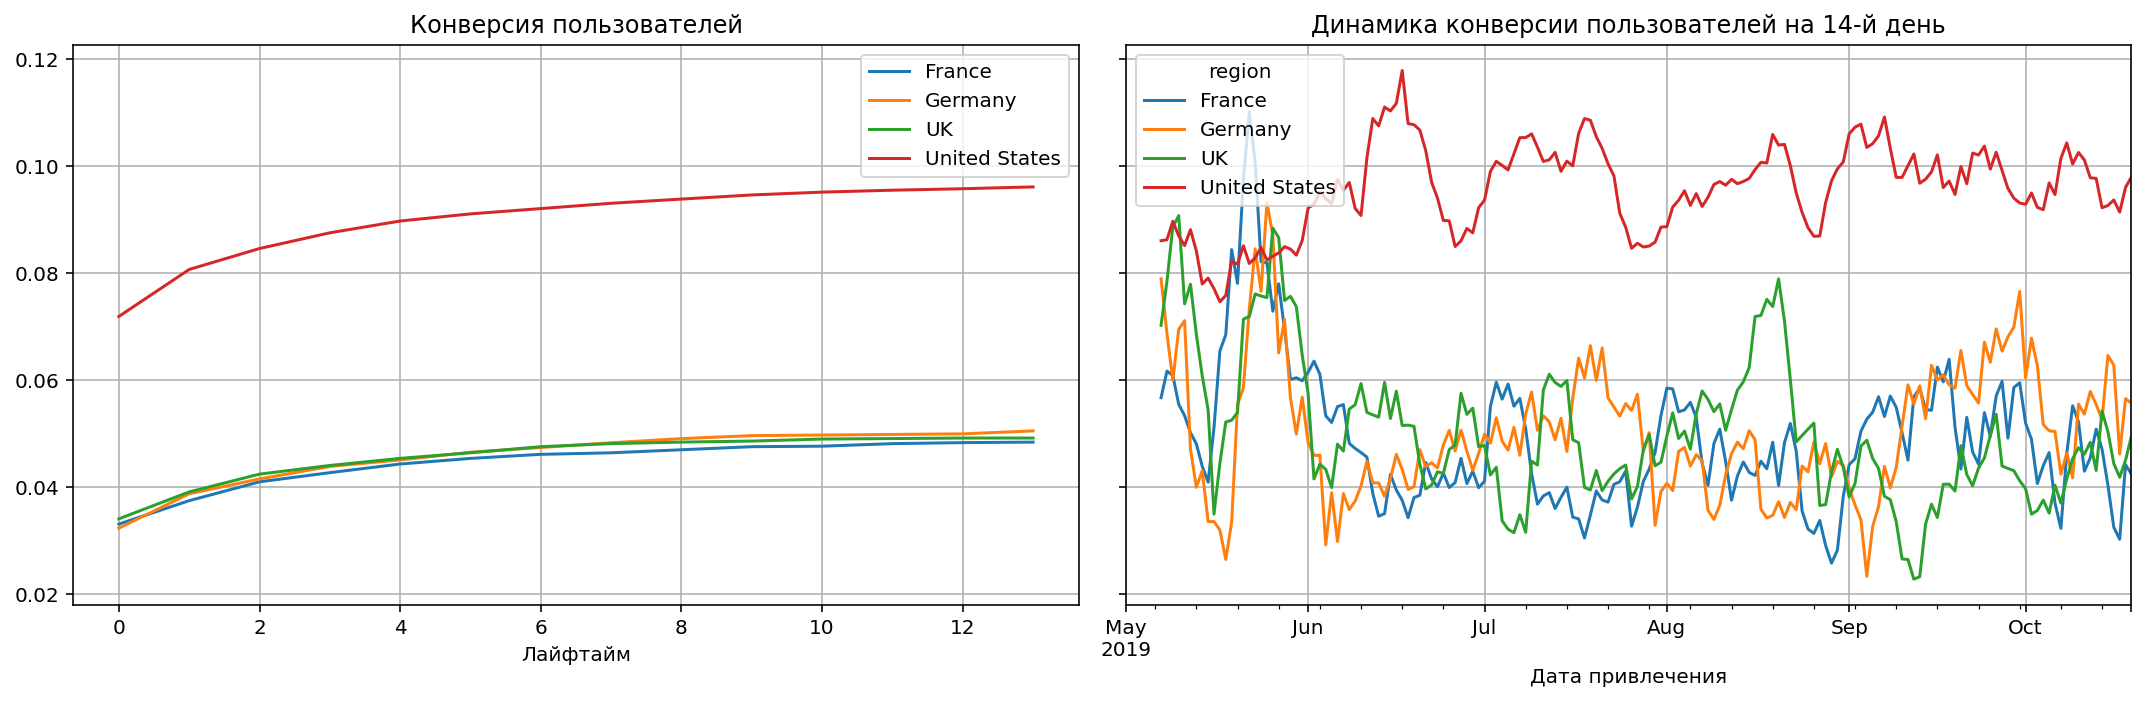

In [51]:
# смотрим конверсию с разбивкой по странам
dimensions = ['region']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Коверсия пользователей из США (около 10 % на 14 день) практически в 2 раза выше, чем конверсия пользователей из других стран (Германии, Великобритании и Франции), где она не превышает 5 %.

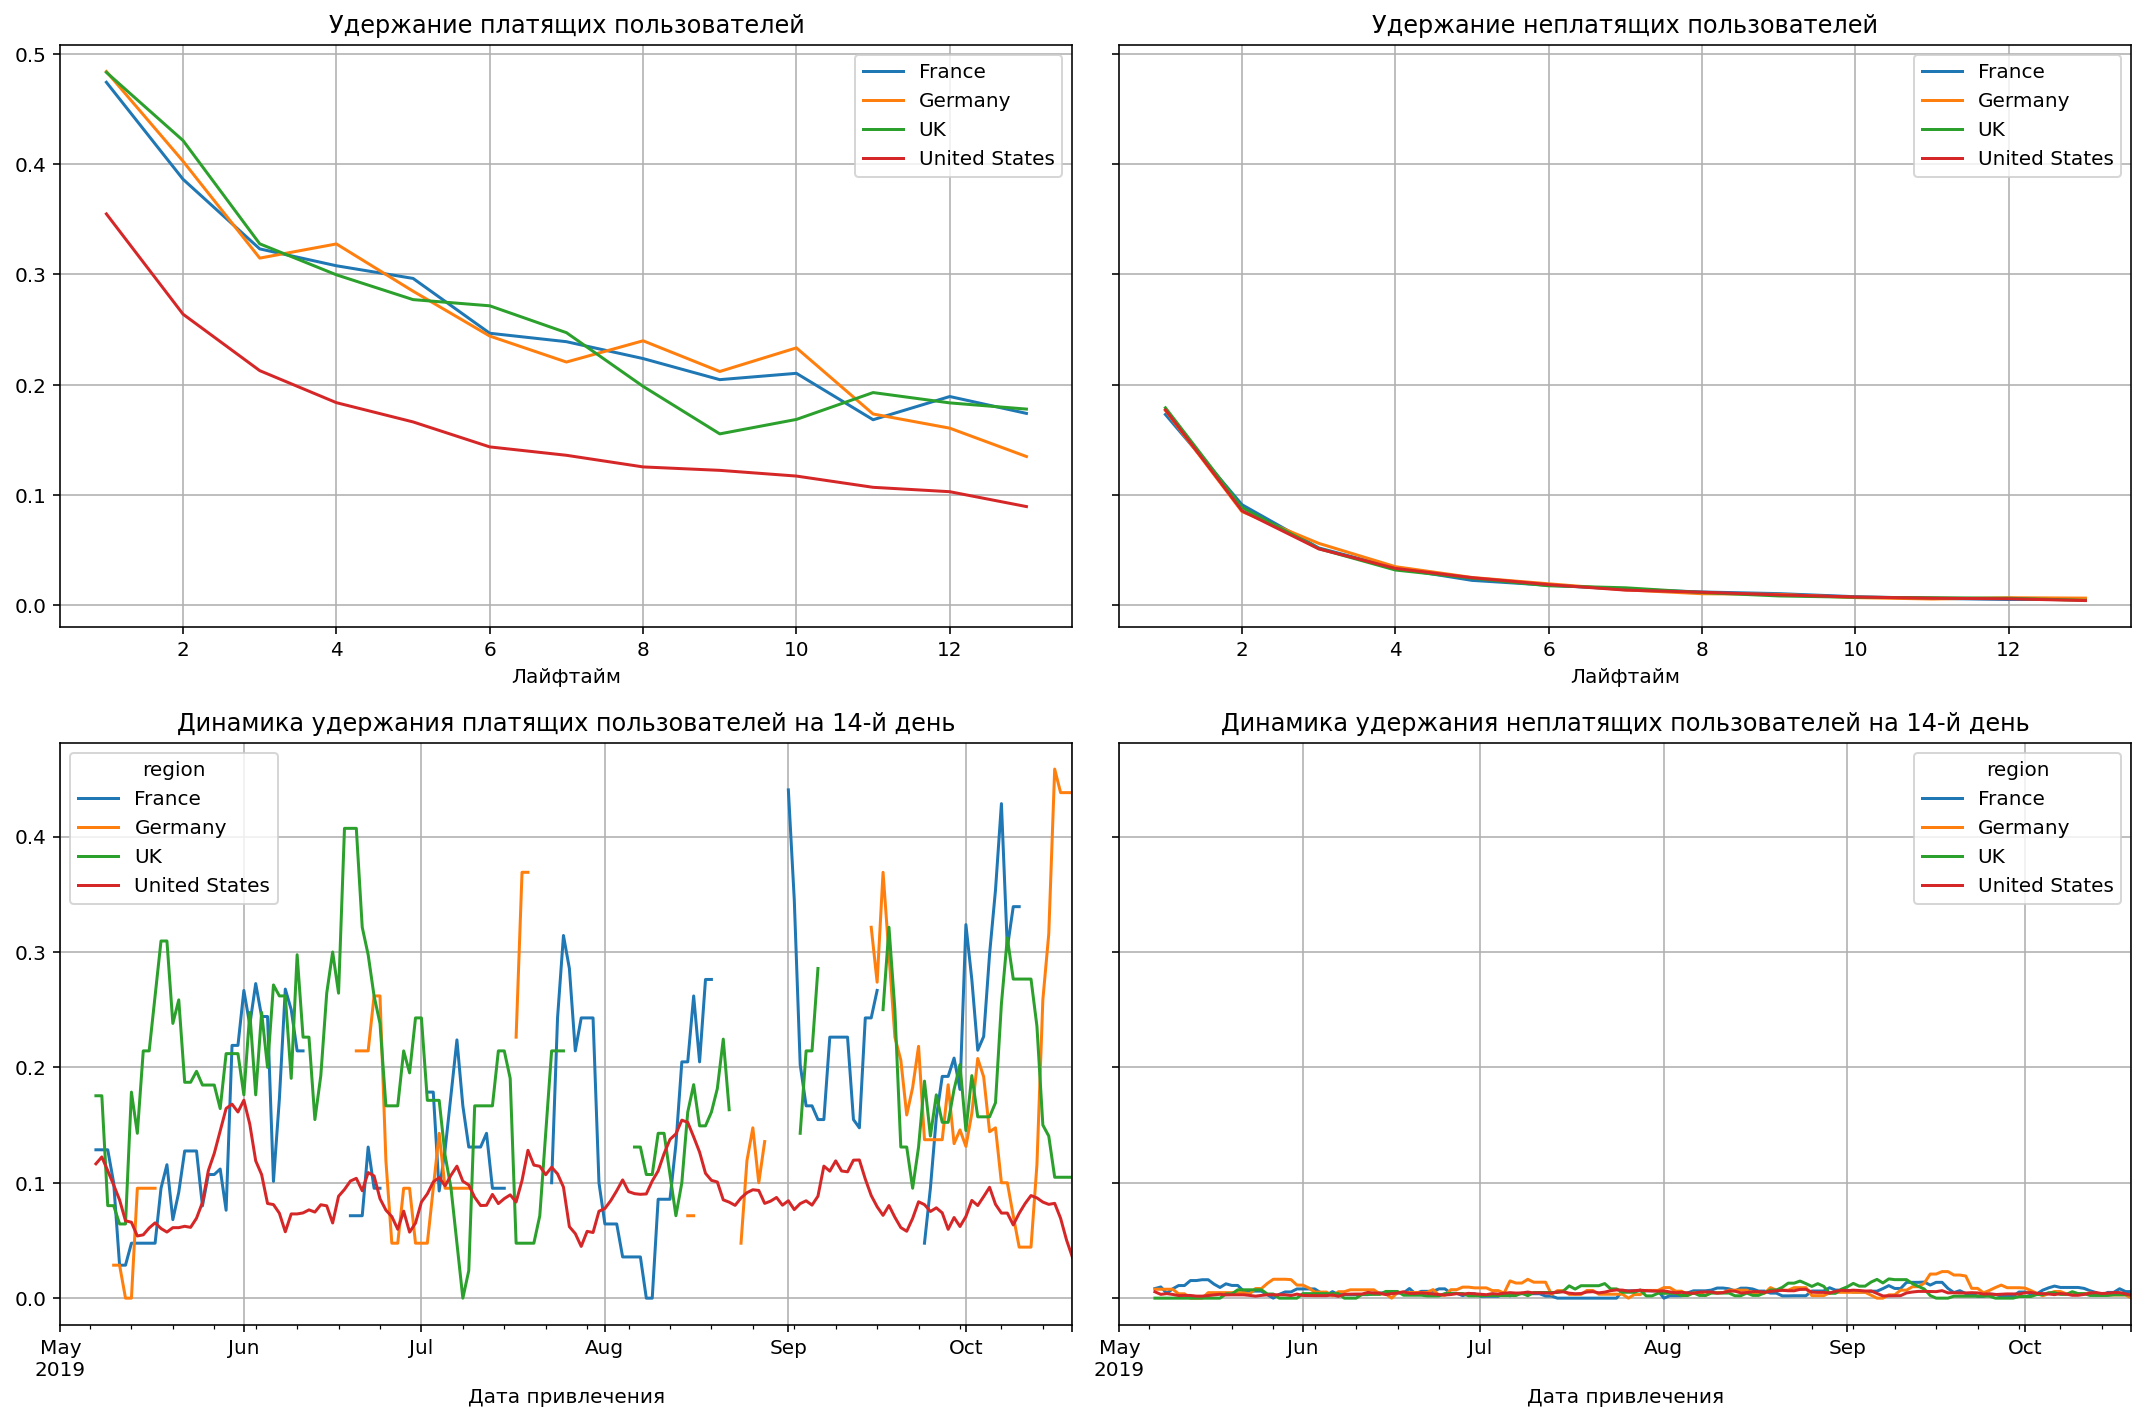

In [52]:
# смотрим удержание с разбивкой по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

А вот удержание пользователей из США на 14 день (9 %) значительно хуже, чем удержание пользователей из Германии (14 %), Франции (18 %) и Великобритании (18 %). Удержание неплатящих пользователей ниже, чем платящих, и не зависит от страны.   

### Проверим конверсию пользователей и динамику её изменения с разбивкой по рекламным каналам. То же самое сделаем с удержанием пользователей. Построим и изучим графики конверсии и удержания.

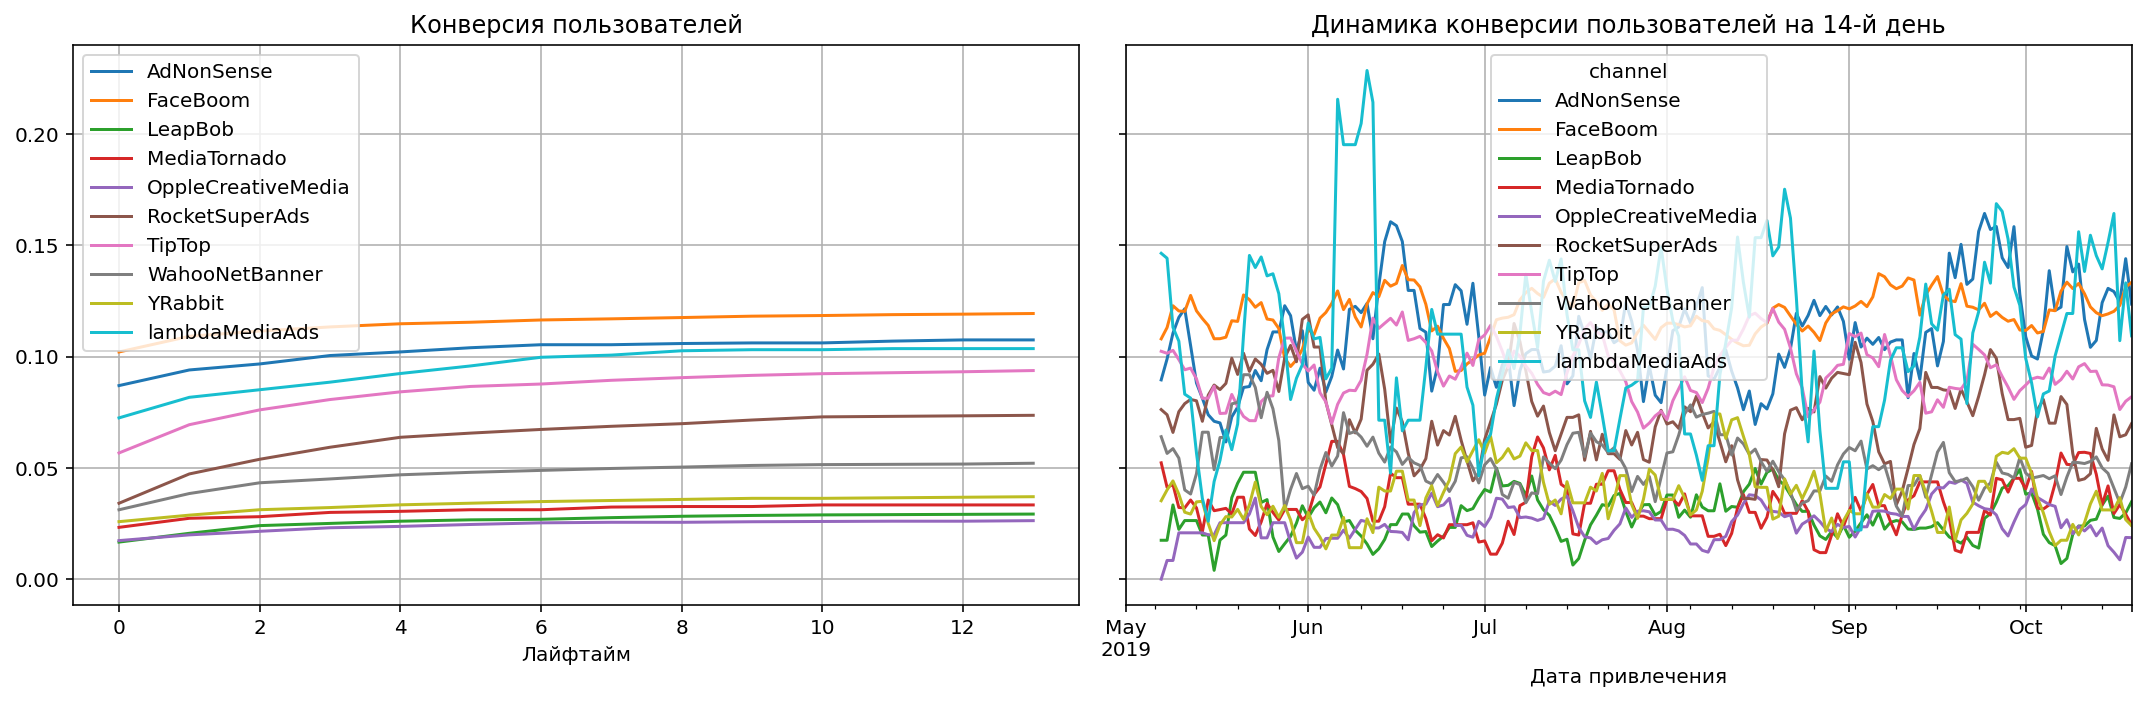

In [53]:
# смотрим конверсию с разбивкой по рекламным каналам
dimensions = ['channel']
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

Конверсия пользователей канала TipTop c самой высокой стоимостью привлечения одного пользователя, на который было потрачено больше всего рекламных денег, на 14 день (конверсия 8 %) ниже, чем у каналов с меньшей стоимостью привлечения: канал lambdaMediaAds (10,5 %), канал AdNonSense (11 %) и канал FaceBoom  с самой высокой конверсией пользователей (14 %) - второй по популярности канал их привлечения.

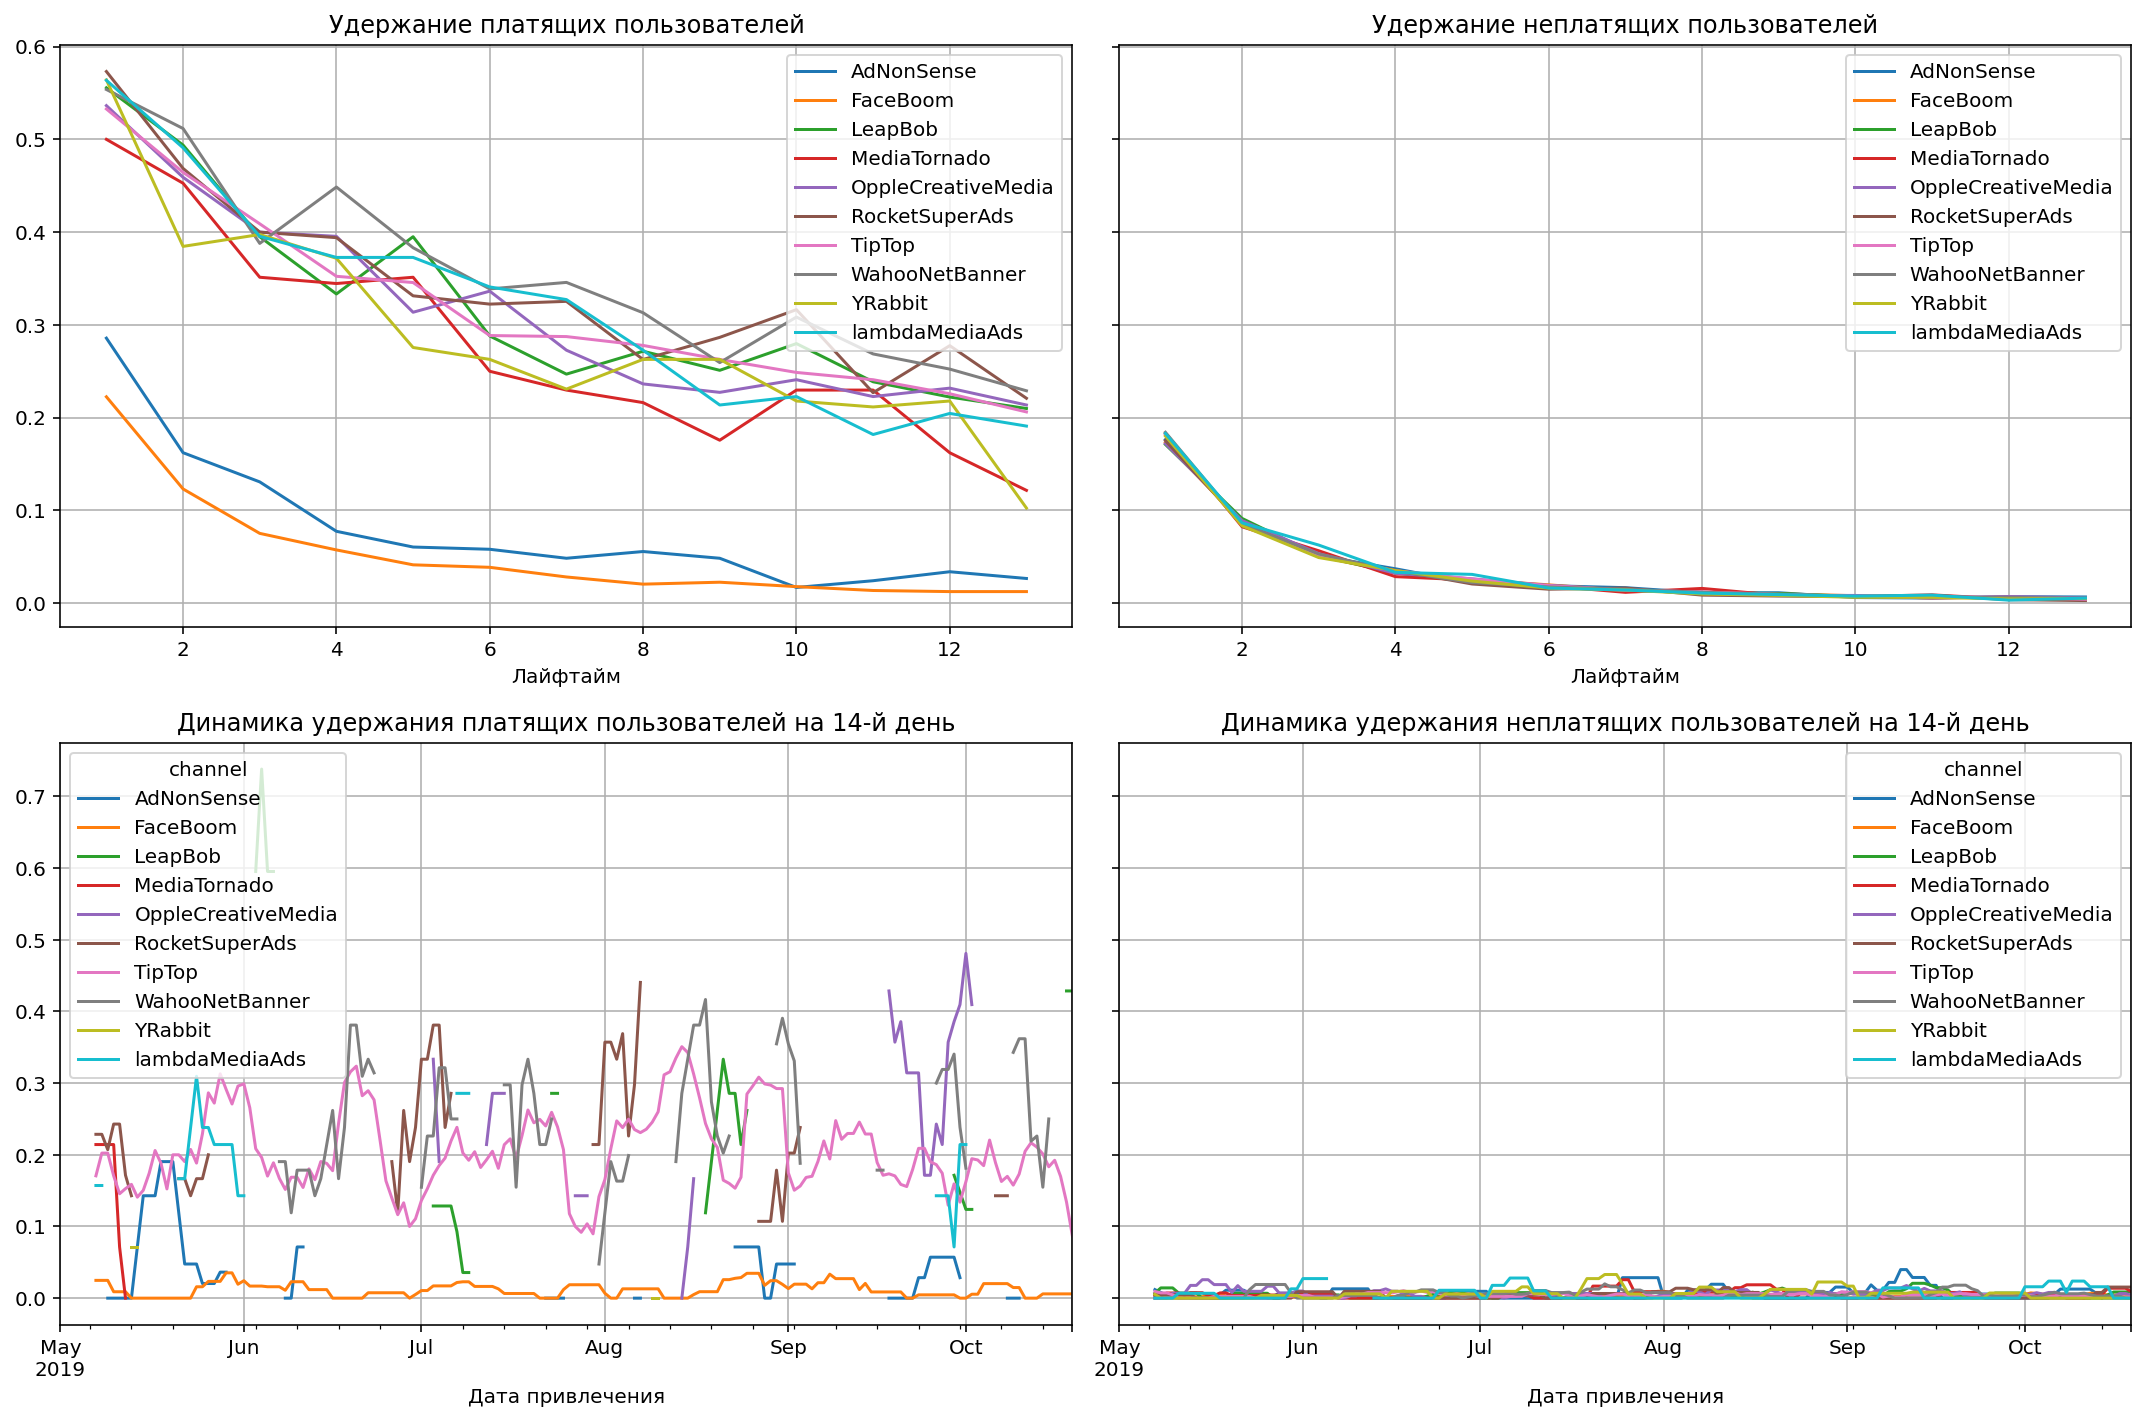

In [54]:
# смотрим удержание с разбивкой по рекламным каналам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions=dimensions
)

plot_retention(retention_grouped, retention_history, horizon_days) 

В тоже время канал TipTop на 14 день демонстрирует неплохой процент удержания пользователей (21 %), хоть есть несколько каналов и с чуть большим удержанием пользователей: RocketSuperAds (21,5 %) и WahooNetBanner (22 %). А вот удержание пользователей, привлеченных через каналы FaceBoom и AdNonSense практически в два раза ниже, чем у других каналов, и на 14 день не превышает 1 и 2 % соотвественно, т.е. приложение теряет практически всех пользователей, привлеченных через эти каналы.

*Выводы по разделу 5:*
- При относительно стабильной динамике LTV, динамика САС сильно возрастает с мая до конца октября, а динамика ROI в это же время снижается (со 140 % в мае до 60 % в октябре), что приводит к неокупаемости рекламы.  В тоже время динамика конверсии пользователей с мая по октябрь держится в среднем на уровне 8 %, а удержание - 10 %;
- Не окупаются пользователи всех устройств, кроме ПК, на привлечение пользователей которого при этом было потрачено меньше всего рекламных денег. Удержание платящих пользователей ПК самое высокое среди всех устройств, а iPhone самое низкое.
- Пользователи из США, являющиеся основной целевой аудиторией приложения и траты на привлечение которых с мая по октябрь увеличились почти в 2 раза, не окупаются, в то время как пользователи из Франции, Германии и Великобритании, которых в сумме значительно меньше, окупились полностью, несмотря на сокращение трат на привлечение пользователей из этих стран. Конверсия пользователей из США лучше, чем из других стран, однако пользователи из этой страны удерживаются значительно хуже.
- Уровень окупаемости пользователей, привлеченных через каналы TipTop, FaceBoom, AdNonSense с самой высокой средней стоимостью привлечения, на первые два из которых было потрачено больше всего рекламных денег, не достигает 100 % на протяжении практически всего исследуемого периода с мая по октябрь. При этом в каждом месяце значительно увеличивали только траты на канал TipTop, с мая по октябрь они выросли не менее, чем в 3,5 раза. Траты на остальные каналы в динамике практически не изменялись, лишь на каналы RocketSuperAds и YRabbit они были снижены, что не помешало этим каналам достигнуть высокого уровня окупаемости. Несмотря на высокую стоимость привлечения и популярность каналов FaceBoom и AdNonSense у них самое низкое удержание пользователей. Можно сказать, что приложение теряет практически всех пользователей, купленных у этих каналов. В тоже время, канал RocketSuperAds, расходы на привлечение пользователей через который были снижены, один из лучших каналов по удержанию пользователей.



## Выводы

Исходные данные были подготовлены к анализу следующих образом:  данные были проверены на наличие пропусков и дубликатов, заголовки стобцов приведены к нижнему и «змеиному» регистрам, тип данных в столбцах с датой и временем перевели в формат datetime, задали функции для расчета и анализа удержания, конверсии, LTV и ROI, составили профили пользователей, построили сводную таблицу с регионом, количеством пользователей в этом регионе и долей платящих среди них, такие же таблицы построили  для устройств и рекламных каналов, посчитали общую сумму расходов на маркетинг, определили, как траты распределены по рекламным источникам, и построили визуализацию изменения расходов по времени, рассчитали среднюю стоимость привлечения пользователей для каждого канала (САС), оценили окупаемость рекаламы, построив графики конверсии и удержания, LTV, ROI и CAC, в том числе с разбивкой по странам, устройствам и реакламным каналам привлечения пользователей.


Больше всего пользователей приложения из США (100 002), в том числе и самая высокая доля платящих среди них (7 %) по сравнению с пользователями из Германии, Великобритании и Франции, количество пользователей в каждой из которых не превышает 18 000, а доля платящих в среднем равна 4 % в каждой. 
Самым популярным устройством, с которого пользователи заходят в приложение является iPhone (54 479 пользователей), чуть менее популярны Android (35 032 пользователей), Mac и PC (по 30 000 пользователей). Доля платящих среди пользователей Mac и iPhone самая высокая, 6,4 % и 6,2 % соотвественно), что также может быть связано с популярностью данных устройств в США. Однако несильно отстает и Android с 5,9 %. На ПК доля платящих пользователей составляет 5 %.

Как и следовало ожидать, больше всего в приложение пришло орагнических пользователей (до 38 % от общего числа пользователей). Самые попярные источники привлечения пользователей -  каналы FaceBoom (29144 пользователя) и TipTop (19561 пользователь). Больше всего платящих пользователей пришло из каналов FaceBoom (12,2 %), AdNonSense (11,3 % из 3880 пользователей), lambdaMediaAds (10,5 % из 2149 пользователей) и TipTop (9,6 %).  
    
Всего на маркетинг в исследуемый период было потрачено 105497.3 руб, большая часть из которых была распределена за этот промежуток времени между каналами TipTop (54751.3) и FaceBoom (32445.6). В связи с этим привлечение пользователей через эти каналы было самым дорогим и составило в среднем 2,8 и 1,11 руб за одного пользователя соотвественно. В то же время каналы AdNonSense и lambdaMediaAds с достаточно высокой  долей платящих пользователей обходятся дешевле, в 1.01 и 0.72 руб за одного пользователя. Средний САС по проекту при этом составил 0,7 руб за одного пользователя.



*Выделим основные причины неэффективности привлечения пользователей:*
- Стоимость привлечения одного клиента (САС) растет, что связано с увеличением рекламного  бюджета и что в итоге не приводит к достижению уровня окупаемости свыше 80 % в течение 14 дней. Динамика ROI пользователей на 14 день с мая по сентябрь снизилась в 2 раза, конверсия пользователей за этот период выросла на 2 % (до 8%), а удержание неплатящих пользователей приблизилось к 0 %; 
- Расходы на привлечение пользователей устройств iPhone и Mac значительно больше, чем Android и PC, в том время как уровень их окупаемости не достигается. Уровень окупаемости пользователей Android выше, а расходы на PC полностью окупились, несмотря на меньший рекламный бюджет. В то же время удержание платящих пользователей iPhone самое низкое среди все остальных устройств;
- Чрезмерно увеличенный рекламный бюджет на привлечение пользователей из США также не привел к достижению уровня окупаемости, в то время как траты на привлечение пользователей из других стран, которые стабильно окупались, снизили. Несмотря на высокую конверсию пользователей из США, удерживаются они значительно хуже;
- Рекламные каналы TipTop и FaceBoom, на которые было потрачено больше всего денег, хоть и привлекли больше пользователей, чем другие каналы, однако полностью не окупились, и у них самое низкое удержание пользователей: от 1 до 2 % на 14 день. 

*Сформулируем рекомендации для отдела маркетинга:*

- Необходимо снизить чрезмерные траты на привлечение пользователей через дорогие и неэффективные рекламные каналы, такие как TipTop и FaceBoom, удержание пользователей, привлеченных через которые, стремится к нулю. Можно потратить деньги на рекламу через канал lambdaMediaAds, у которого самое высокое «качество» пользователей (LTV), хорошая окупаемость, достаточно высокий процент платящих пользователей (10.5 %) и относительно невысокая средняя цена за привлечение одного пользователя (0.72 руб), высокая конверсия и неплохое удержание, либо через канал RocketSuperAds, расходы на который были необоснованно снижены, который также имеет неплохую конверсию, более высокое удержание, более низкую стоимость привлечения одного пользователя (0.41 руб), но чуть меньший процент платящих (7,9 %); 
- Не следует вкладывать большие деньги только в привлечение пользователей из США, пусть среди них доля платящих и выше, чем  в других странах, однако только пользователи из Германии, Великобритании и Франции стабильно окупаются и лучше удерживаются. Поэтому рекламный бюджет на привлечение пользователей из этих стран стоило бы увеличить.
- Также стоит уменьшить расходы на привлечение пользователей iPhone и Mac, так как их окупаемость не достигает 100 % и значительно меньше, чем у пользователей Android и PC. Стоит обратить особое внимание на привлечение пользователей PC, которые стабильно окупаются и удерживаются лучше, чем пользователи других устройств.